<a href="https://colab.research.google.com/github/MangutTatarin/DataScience/blob/main/Mutulov_Mangut_second_interim_work_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Мутулов Мангут Михайлович,* Практический кейс

"Прогнозирование конечных свойств новых материалов (композиционных материалов)"

## *Описание задачи*

Композиционные материалы — это искусственно созданные материалы,
состоящие из нескольких других с четкой границей между ними. Композиты
обладают теми свойствами, которые не наблюдаются у компонентов по
отдельности. При этом композиты являются монолитным материалом, т. е.
компоненты материала неотделимы друг от друга без разрушения
конструкции в целом. Яркий пример композита - железобетон. Бетон
прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура
внутри бетона компенсирует его неспособность сопротивляться сжатию,
формируя тем самым новые, уникальные свойства. Современные композиты
изготавливаются из других материалов: полимеры, керамика, стеклянные и
углеродные волокна, но данный принцип сохраняется. У такого подхода есть
и недостаток: даже если мы знаем характеристики исходных компонентов,
определить характеристики композита, состоящего из этих компонентов,
достаточно проблематично. Для решения этой проблемы есть два пути:
физические испытания образцов материалов, или прогнозирование
характеристик. Суть прогнозирования заключается в симуляции
представительного элемента объема композита, на основе данных о
характеристиках входящих компонентов (связующего и армирующего
компонента).




На входе имеются данные о начальных свойствах компонентов
композиционных материалов (количество связующего, наполнителя,
температурный режим отверждения и т.д.).

## **Задача**:
Спрогнозировать ряд конечных свойств композиционных
материалов. Сформулировать выводы по результату.
Объединение файлов датасета провести по индексу (тип объединения
INNER).

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # рисуем графики
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns # рисуем другие графики
import sklearn # библиотека программного обеспечения для машинного обучения
from scipy import stats # используем для подсчета статистических функций
from sklearn import metrics # посмотрим функции оценки ошибки прогноза для конкретных целей
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold # делим выборку на тестовую и тренировочную, используем кросс-валидацию
from sklearn.tree import DecisionTreeRegressor # регрессор "деревья решений"
from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error, mean_absolute_error # посмотрим среднеквадратичную ошибку, среднюю абсолютную процентную ошибку, среднюю абсолютную ошибку
from sklearn.model_selection import GridSearchCV # помощник в выборе гиперпараметров модели и рандомизированный поиск по параметрам
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

import os
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_classification
from keras import models
%matplotlib inline


## **Разведочный анализ**
Разведочный анализ данных (Exploratory Data Analysis) – предварительное исследование Датасета (Dataset) с целью определения его основных характеристик, взаимосвязей между признаками, а также сужения набора методов, используемых для создания Модели (Model) Машинного обучения (Machine Learning)

### *1) Первичный обзор.* Посмотрим на наш датасет, чтобы получить общее представление о его содержимом

#### Загружаем датасет

In [78]:
from google.colab import drive
drive.mount('/content/drive') #монтируем файлы из моего google диска, где хранится датасет


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df_bp = pd.read_excel('/content/drive/MyDrive/Interim/second/X_bp.xlsx') # загружаем первую таблицу датасета
df_bp.head(3) # выводим первые три строки

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [80]:
df_bp.shape

(1023, 11)

In [81]:
df_nup = pd.read_excel('/content/drive/MyDrive/Interim/second/X_nup.xlsx') # загружаем вторую таблицу датасета
df_nup.head(3) # выводим первые три строки

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0


In [82]:
df_nup.shape

(1040, 4)

#### Объединяем файлы датасета по индексу (тип объединения INNER).

Эти два датасета имеют разное количество строк. По условию задачи объединяем их по типу INNER

In [83]:
df = df_bp.merge(df_nup, left_index=True, right_index=True, how='inner')

In [84]:
df.head()

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4,0,5.0,57.0


Удаляем столбцы, которые не несут никакой информации, столбцы(Unnamed) с id.

In [85]:
df.drop(['Unnamed: 0_x'], axis=1, inplace=True)
df.drop(['Unnamed: 0_y'], axis=1, inplace=True)

In [86]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


####Проверим размерность данных

In [87]:
df.shape

(1023, 13)

Итоговый датасет имеет 13 столбцов и 1023 строки, 17 строк из таблицы X_nup было отброшено,т.е часть данных удалена на начальном этапе исследования.

При использовании "INNER" будут удалены все строки, которым не нашлась соответствующая пара в другой таблице

### *2)Немного "причешем" наш датасет, для дальнейшей работы.*

In [88]:
df.info() #Просмотрим информацию о датасете, проверим тип данных в каждом столбце (типы признаков)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [89]:
df.nunique() # Поиск уникальных значений с помощью функции nunique

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
Модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Видим что в столбце "Угол нашивки, град" всего два значения. Так как кол-во уникальных значений равно двум, приведем данные в этом столбце к значениям 0 и 1

In [90]:
# Посмотрим на эти уникальные значения и их количество
df["Угол нашивки, град"].value_counts()

0     520
90    503
Name: Угол нашивки, град, dtype: int64

In [91]:
#Приведем столбец "Угол нашивки, град" к значениям 0 и 1 и integer
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [92]:
#Так как значения уже не вградусах,переименуем столбец
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


Посчитаем количество уникальных элементов, и убедимся, что количество не изменилось после наших манипуляций
(прошлое значение 0 - 520, 90 - 503)

In [93]:
# Посмотрим на эти уникальные значения и их количество
df["Угол нашивки"].value_counts()

0    520
1    503
Name: Угол нашивки, dtype: int64

Как видим всё хорошо, количество не изменилось

### *3) Обработка пропущенных значений.*
Работа с отсутствующими значениями – одна из самых сложных, но и самых распространенных проблем очистки. Большинство моделей не предполагают пропусков.

In [94]:
# Проверим набор данных на пропуски.
df.isna().sum()
#Пропусков нет

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропущенных данных нет, очистка не требуется

#### *Тепловая карта пропущенных значений*
Визуализируем пропущенные значения с помощью тепловой карты.
Приведенная ниже карта демонстрирует паттерн пропущенных значений. По горизонтальной оси расположены признаки, по вертикальной – количество записей/строк. Желтый цвет соответствует пропускам данных.


<Axes: >

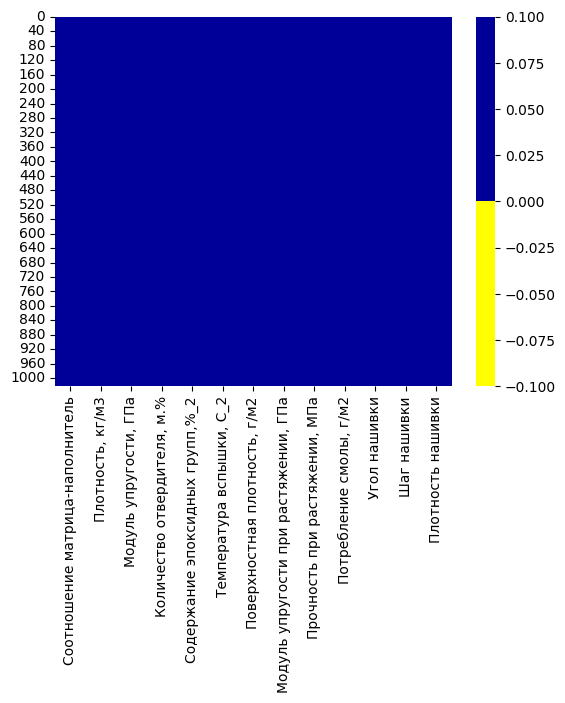

In [95]:
cols = df.columns[:13]
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffff00', '#000099']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))

#### *Процентный список пропущенных данных*
Если в наборе много признаков и визуализация занимает много времени, можно составить список долей отсутствующих записей для каждого признака.
Этот список является полезным резюме, которое может отлично дополнить визуализацию тепловой карты.

In [96]:
# Как видим пропусков точно нет
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
Модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


Можем точно сказать, пропущенных данных нет.

### *4) Обработка дубликатов*
Дубликаты в датасете представляют собой повторяющиеся записи, это означает, что в наборе данных есть две или более строки, которые содержат идентичные значения во всех столбцах или в выбранных столбцах. Перед удалением дубликатов всегда важно оценить природу и причины возникновения. Некоторые дубликаты могут быть результатом ошибок при сборе данных или ошибочных записей, в то время как другие могут быть истинными повторениями одних и тех же наблюдений.

In [97]:
#Проверим датасет на дубликаты
df.duplicated().sum()
print('В данном датасете', len(df) - len(df.drop_duplicates()), 'дубликатов')

В данном датасете 0 дубликатов


### *4)Исследование переменных.*
 Прежде чем применять те или иные методы обучения, нам необходимо удостовериться, что они применимы к текущему датасету. Раздел описательной статистики включает в себя проверку на нормальность распределения и определение прочих статистических метрик. С этим нам поможет замечательная библиотека pandas-profiling.(случайно наткнулся в интернете, очень понравилась) Установим самую свежую версию во избежание ошибок.

In [98]:
df.describe() # посмотрим на описательную статистику

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


Cреднее и медианное значения данных в колонках близки друг к другу.

#### Вычисляем коэффициенты ранговой корреляции Кендалла, строим тепловую карту, так легче ориентировать.

Коэффициент Кендалла — это статистический коэффициент корреляции, который измеряет степень соответствия между двумя ранжированными переменными. Он представляет собой меру согласованности между двумя рядами данных, упорядоченными по определенному признаку, и измеряет степень их взаимной связи.

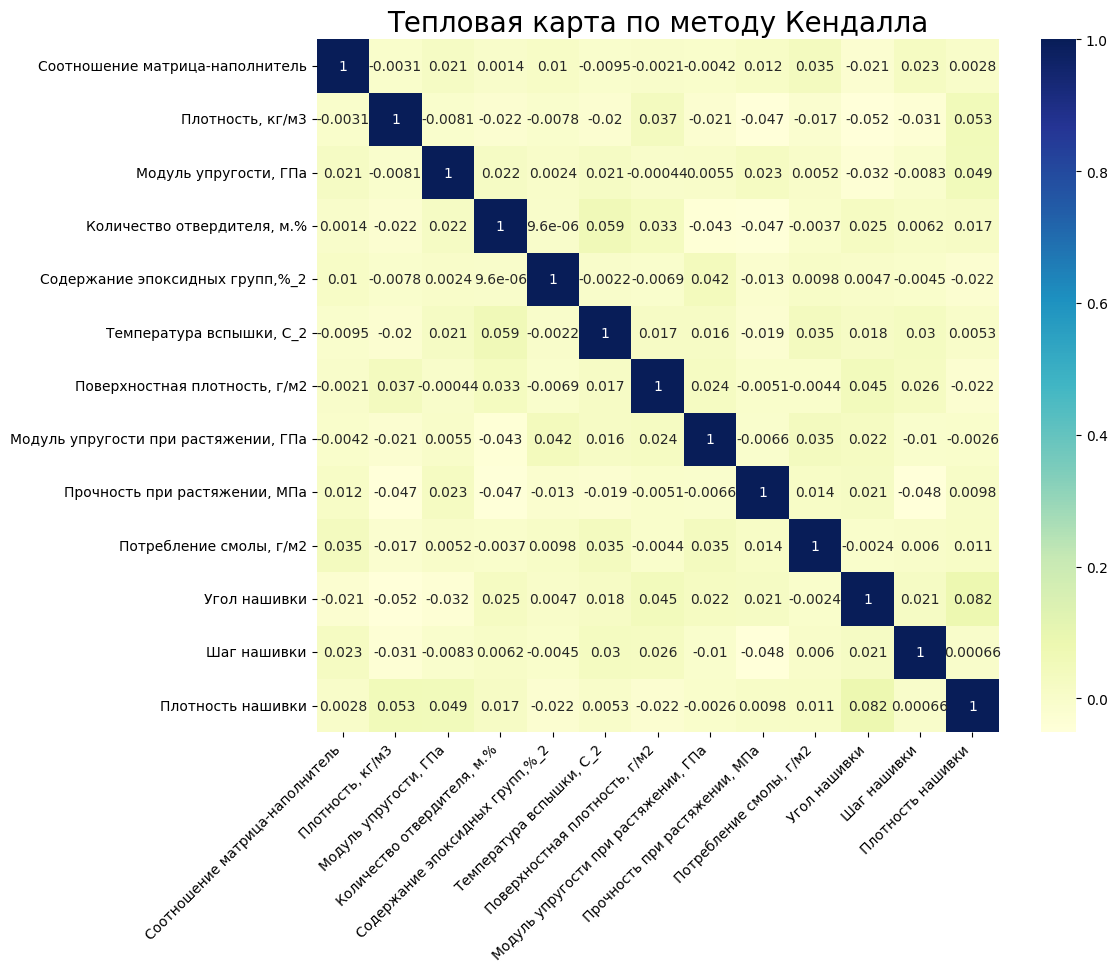

In [99]:
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# plotting correlation heatmap
sns.heatmap(df.corr(method ='kendall'), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.title('Тепловая карта по методу Кендалла', fontsize = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Статистической зависимости не наблюдаем.

#### Вычисляем коэффициенты корреляции Пирсона,строим тепловую карту.

`Коэффициент корреляции Пирсона-это ковариация двух переменных, деленная на произведение их стандартных отклонений.

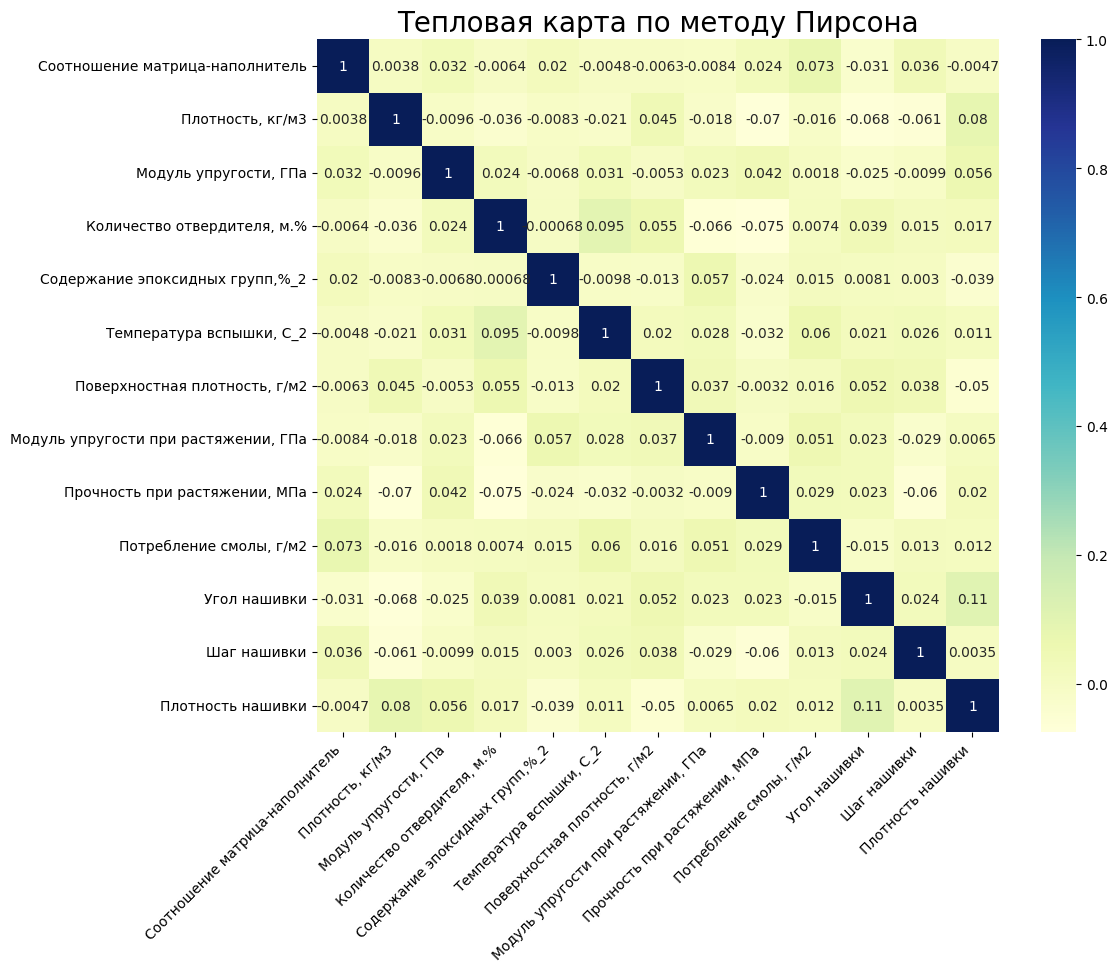

In [100]:
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# plotting correlation heatmap
sns.heatmap(df.corr(method ='pearson'), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.title('Тепловая карта по методу Пирсона', fontsize = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Статистической зависимости не наблюдаем.

### *5)Обнаружение аномалий*
Самый легкий способ обнаружить выбросы – визуальный. Мы построим разновидность графика "ящик с усами"

In [101]:
df.columns # Выведим названия столбцов, чтобы потом было удобно копировать их названия :)

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'Модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

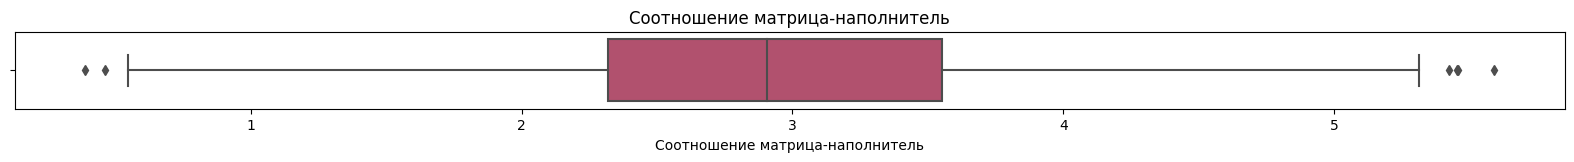

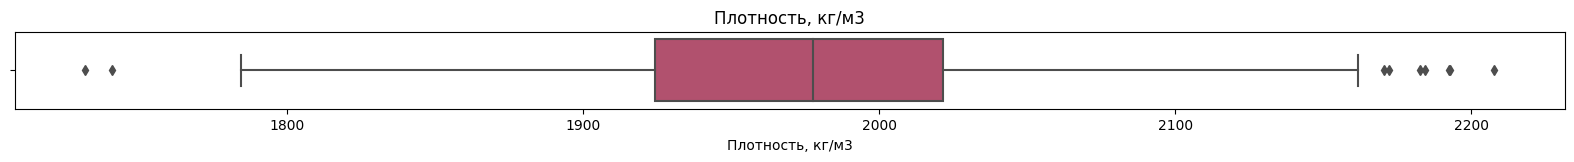

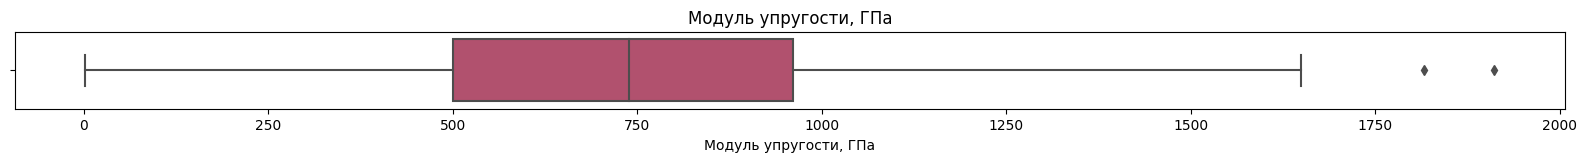

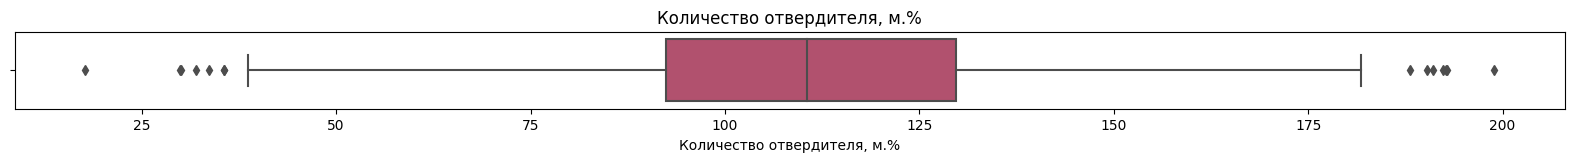

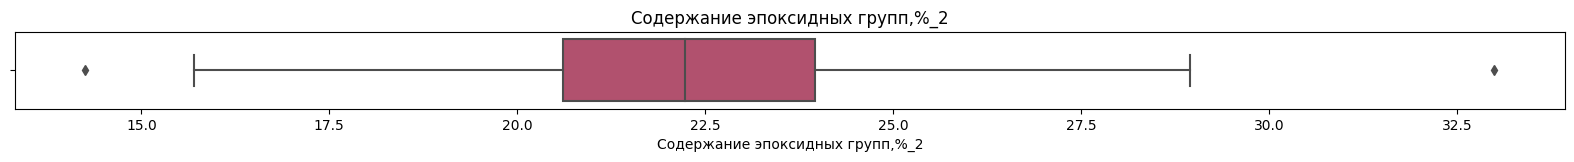

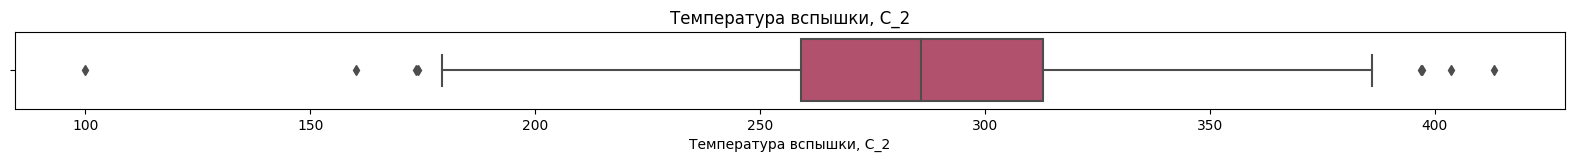

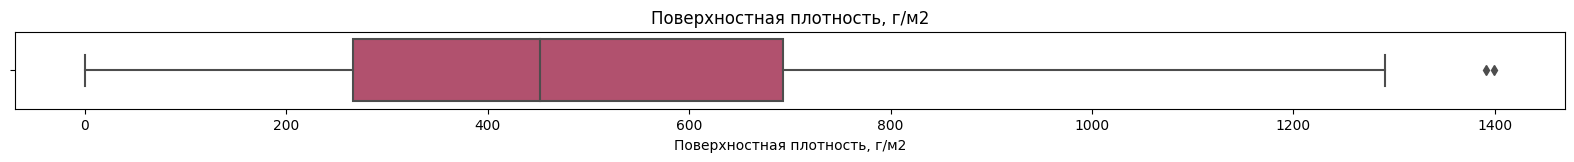

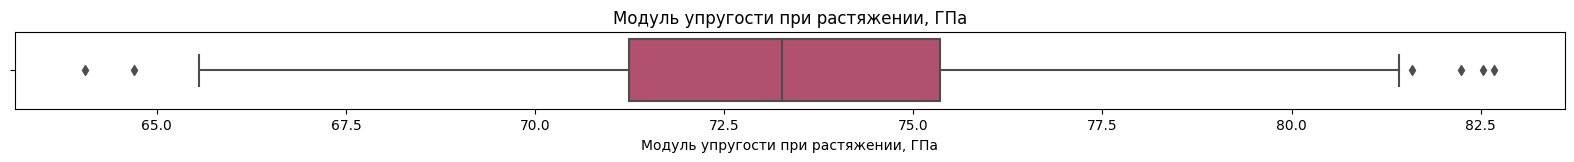

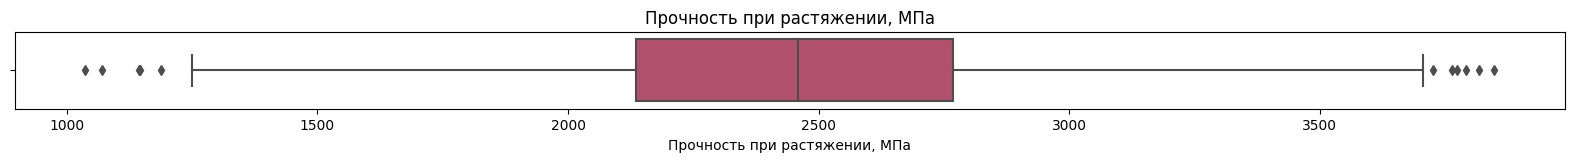

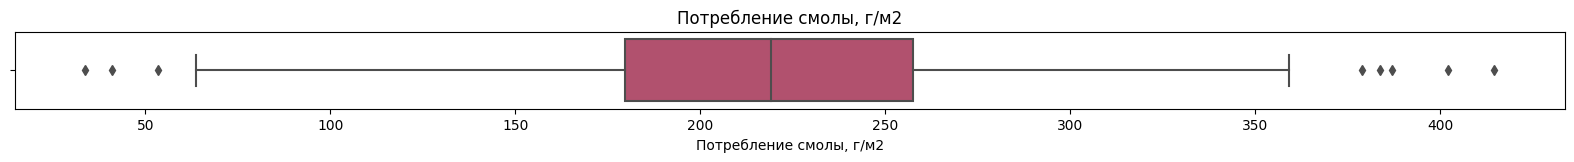

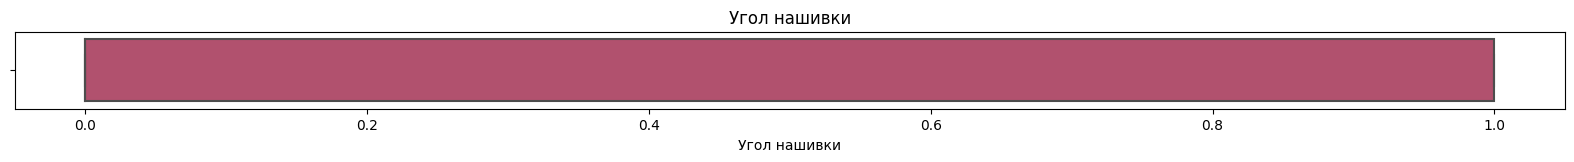

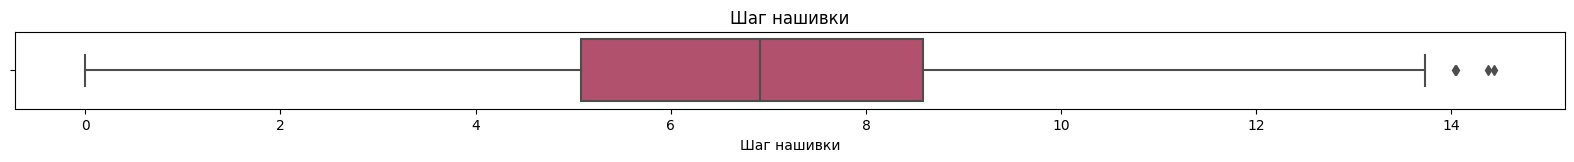

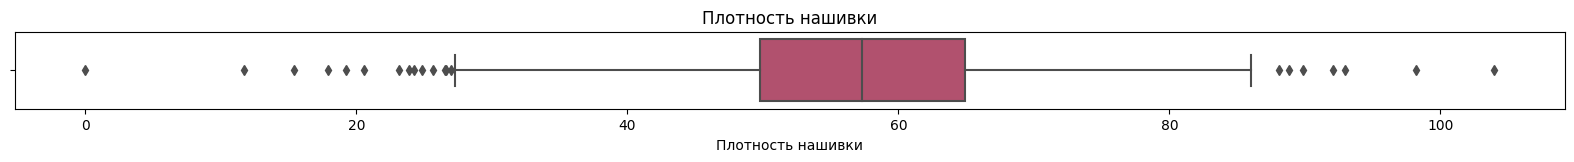

In [102]:
for column in df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'Модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки']]:
        plt.figure(figsize = (20,1))
        plt.title(column)
        sns.boxplot(data = df, x = column, palette = "flare")

Многие алгоритмы машинного обучения чувствительны к разбросу и распределению значений признаков обрабатываемых объектов. Соответственно выбросы во входных данных могут исказить и ввести в заблуждение процесс обучения алгоритмов машинного обучения, что приводит к увеличению времени обучения, снижению точности моделей и, в конечном итоге, к снижению результатов.

Построим гистограммы распределения каждой из переменных без нормализации и исключения шумов

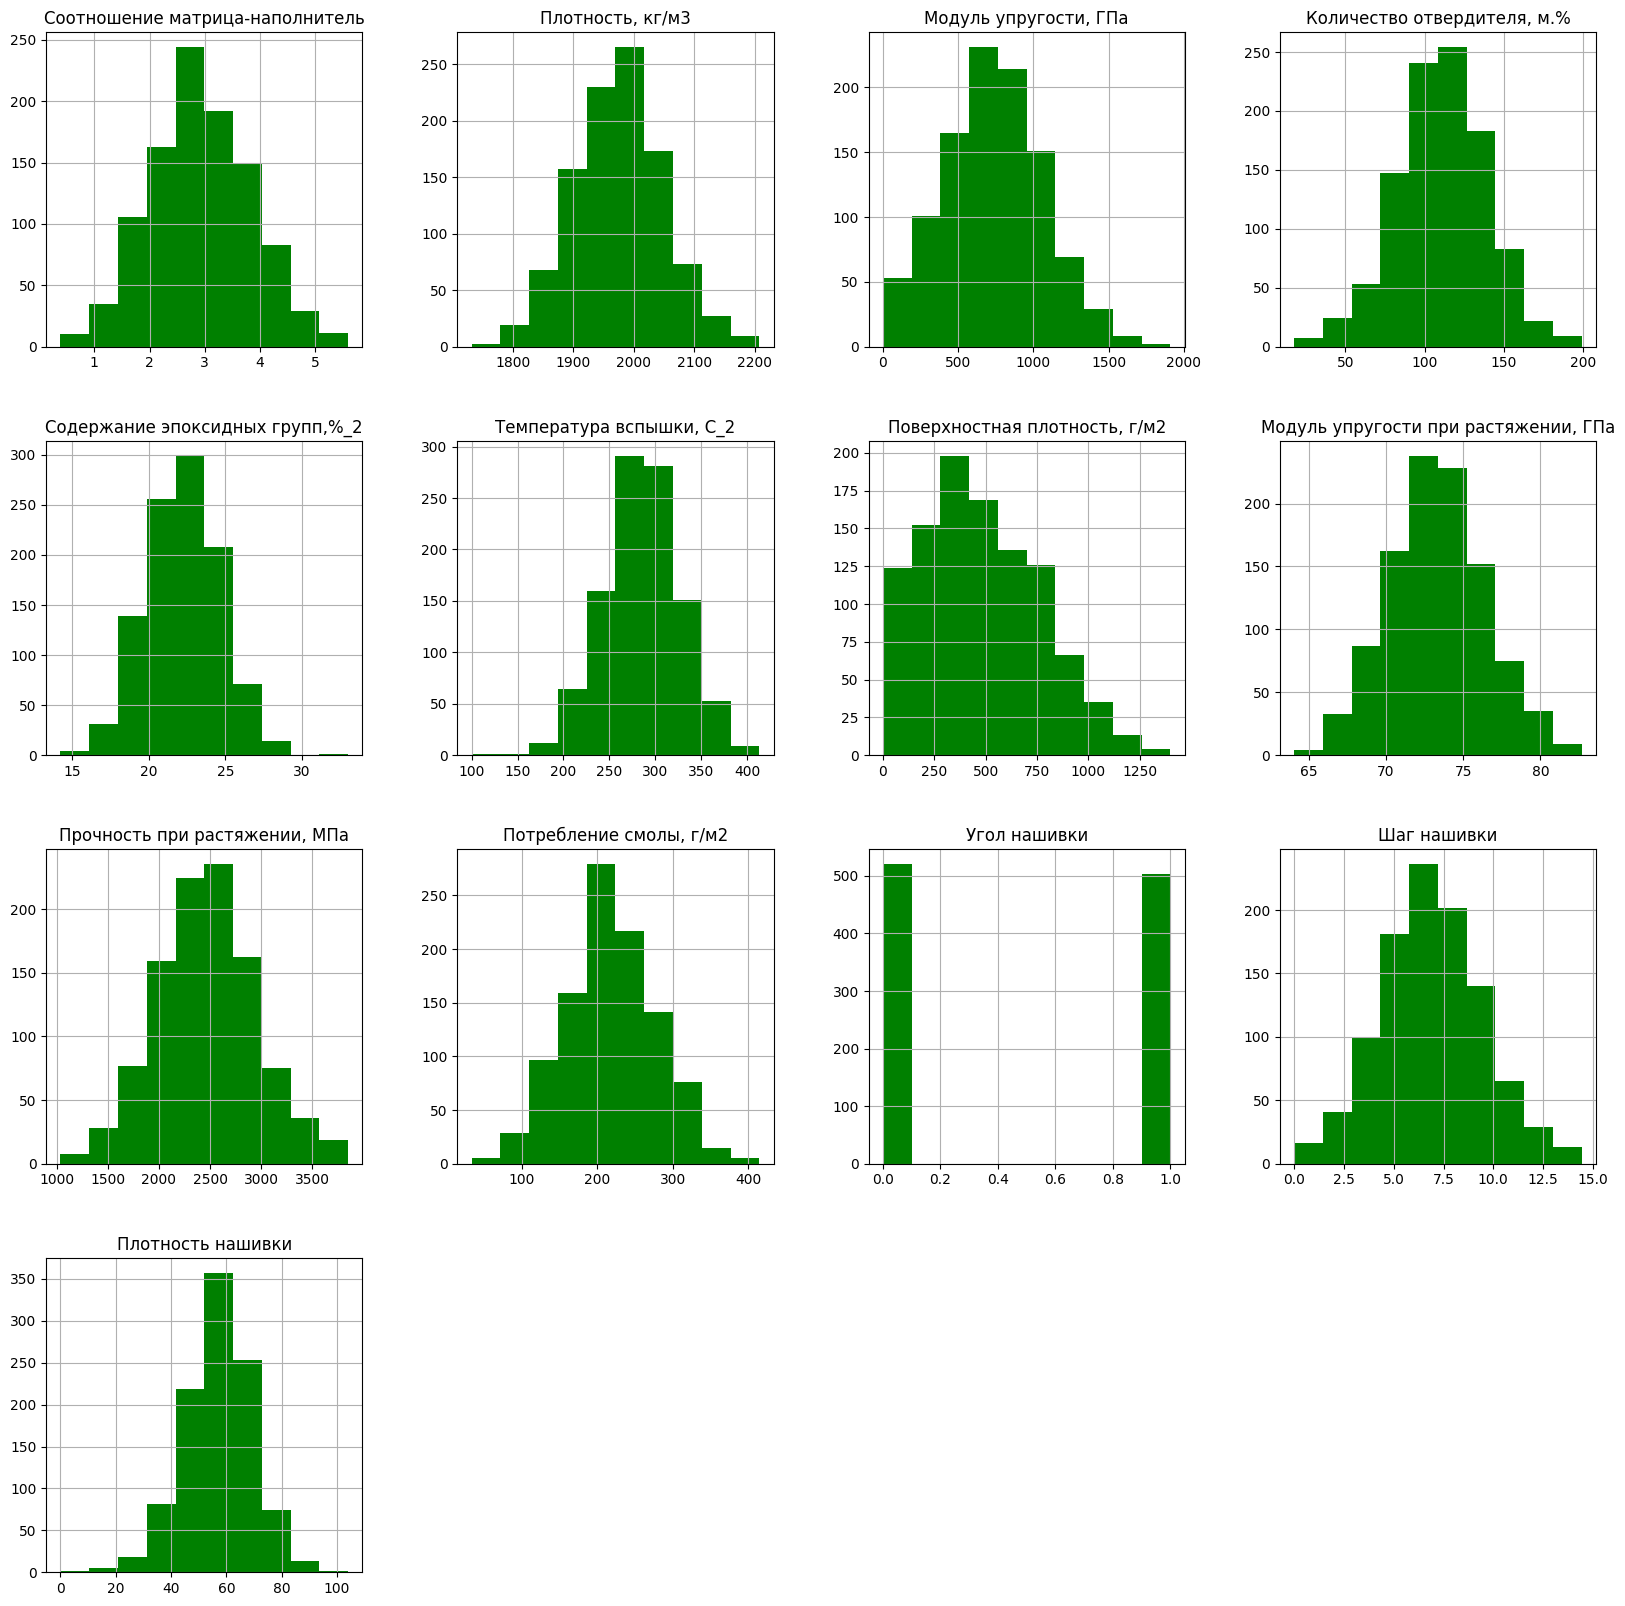

In [103]:
df.hist(figsize = (20,20), color = "g")
plt.show()

При проведении анализа выявлены параметры близкие к нормальному:

* Соотношение матрица-наполнитель;
* Плотность, кг/м3; Модуль упругости, Гпа;
* Количество отвердителя, м.%;
* Содержание эпоксидных групп,%_2;
* Температура вспышки, С_2;
* Поверхностная плотность, г/м2;
* Модуль упругости при растяжении, Гпа;
* Прочность при растяжении, Мпа;
* Потребление смолы, г/м2;
* Шаг нашивки;
* Плотность нашивки.

Преимущественно данные стремятся к нормальному распределению. Угол нашивки, как и отражено в датасете, имеет только два значения 90(1) градусов и 0(0) градусов, что отражает общий подход к проведению нашивки материалов, а также может быть использовано при обработке данных. Учитывая отсутствие иных показателей для угла нашивки, предлагаем в прогнозе использовать категориальный, а не непрерывный подход при анализе данного параметра.

### Визуализация корреляционной матрицы с помощью тепловой карты

In [104]:
mask = np.triu(df.corr())

* Создаем полотно для отображения большого графика
* Визуализируем данные кореляции и создаем цветовую палитру

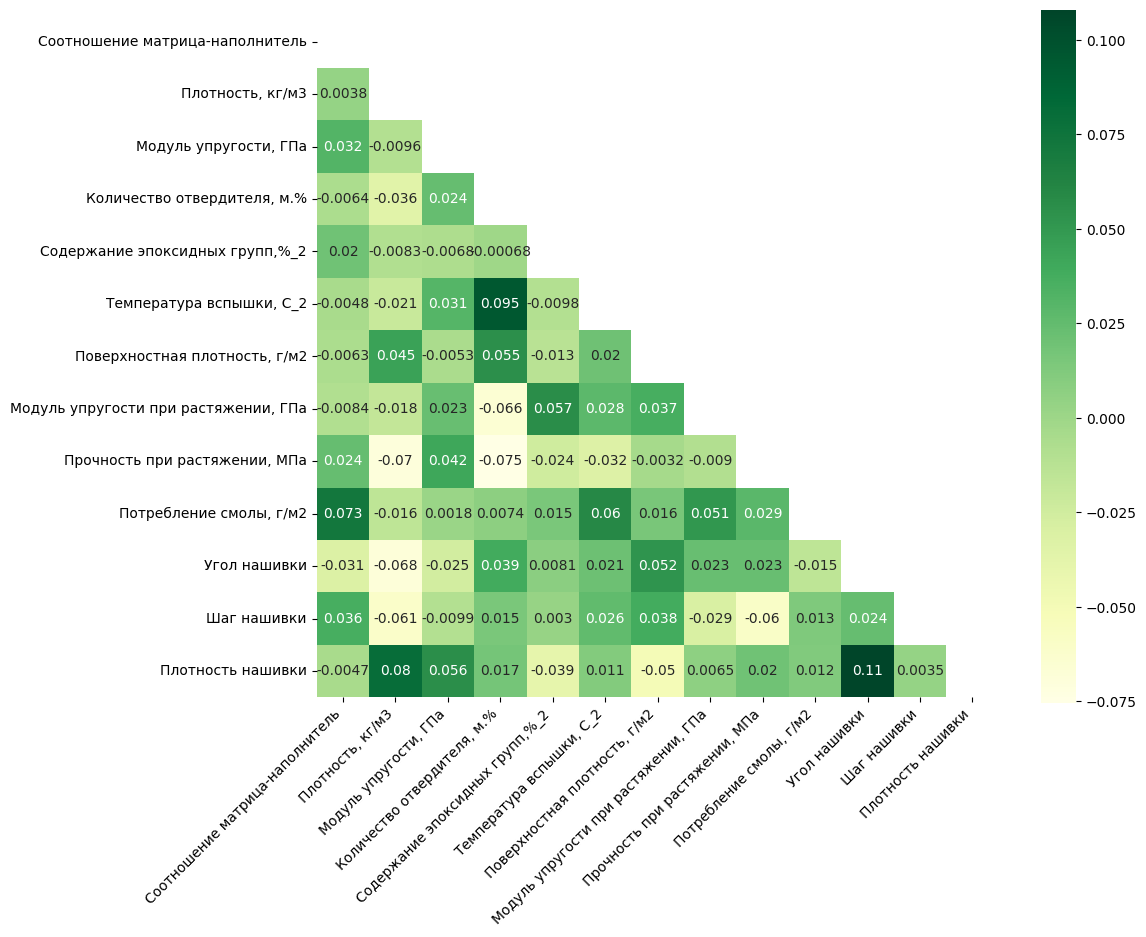

In [105]:
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'YlGn')
plt.xticks(rotation = 45, ha='right')
plt.show()

Максимальная корреляция между плотностью нашивки и углом нашивки составляет 0.11, что говорит об отсутствии зависимости между этими данными.

Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

График корреляции подтверждает данные теории композитных материалов. Мы видим, что на качество материла влияет температура вспышки и количество отвердителя из-за взаимодействия отвердителя с матрицей и наполнителем под влиянием температуры. Угол нашивки и плотность нашивки несомненно оказывают влияние на свойства материала. А потребление смолы и соотношение матрицы-наполнителя, плотности и плотности нашивки, модуля упругости и плотности нашивки имеют не особенно выраженную корреляцию.

**Вывод на данном этапе работы: Мы наблюдаем выбросы в каждом столбце, кроме столбца "Угол нашивки" и корреляция входных переменных очень слабая.**

## Предобработка данных

#### Удаляем выбросы.
Для удаления выбросов существует 2 основных метода - метод 3-х сигм и межквартильных расстояний. Сравним эти 2 метода.

In [106]:

metod_3s = 0
metod_iq = 0
count_iq = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
count_3s = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма.
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod_3s += d['3s'].sum()
    count_3s.append(d['3s'].sum())
    print(column,'3s', ': ', d['3s'].sum())

    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iq += d['iq'].sum()
    count_iq.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод 3-х сигм, выбросов:', metod_3s)
print('Метод межквартильных расстояний, выбросов:', metod_iq)

Соотношение матрица-наполнитель 3s :  0
Соотношение матрица-наполнитель :  6
Плотность, кг/м3 3s :  3
Плотность, кг/м3 :  9
Модуль упругости, ГПа 3s :  2
Модуль упругости, ГПа :  2
Количество отвердителя, м.% 3s :  2
Количество отвердителя, м.% :  14
Содержание эпоксидных групп,%_2 3s :  2
Содержание эпоксидных групп,%_2 :  2
Температура вспышки, С_2 3s :  3
Температура вспышки, С_2 :  8
Поверхностная плотность, г/м2 3s :  2
Поверхностная плотность, г/м2 :  2
Модуль упругости при растяжении, ГПа 3s :  0
Модуль упругости при растяжении, ГПа :  6
Прочность при растяжении, МПа 3s :  0
Прочность при растяжении, МПа :  11
Потребление смолы, г/м2 3s :  3
Потребление смолы, г/м2 :  8
Угол нашивки 3s :  0
Угол нашивки :  0
Шаг нашивки 3s :  0
Шаг нашивки :  4
Плотность нашивки 3s :  7
Плотность нашивки :  21
Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


Результаты показывают, что выбросы распределены по разным признакам. Какого-то скопления выбросов в одном из признаков не обнаружено. Поэтому можно удалять выбросы, потому что глобальных изменений в зависимостях они не дадут.

####Удаляем выбросы. Методом межквартильного диапазона.
**Удаляем выбросы этим методом до тех пор пока размерность датасате не станет равной (922, 13).**
Эта размерность найдена опытным путем, после каждого удаления строил "ящик с усами" и смотрел результат.

In [109]:
# Нашел код с этим методом здесь - https://www.codecamp.ru/blog/remove-outliers-python/
#find Q1, Q3, and interquartile range for each column
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe
df.shape

(922, 13)

In [ ]:
# Можно так же удалить выборосы методом 3-х сигм, но здесь этот метод показал себя хуже. Так что не будем его использовать.
m_3s = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    m_3s[column] = (zscore.abs() > 3)
df = df[m_3s.sum(axis=1)==0]
df.shape

(922, 13)

####Еще раз выведем ящик с усами и посмотрим данные после удаления выбросов

Если выбросы остались, значит вы не добились размерности (922,13). Возвращаемся к методу межквартильного диапазона и жмем еще!!!! :)

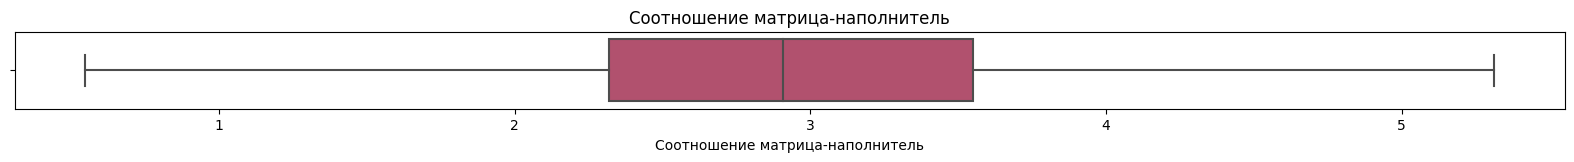

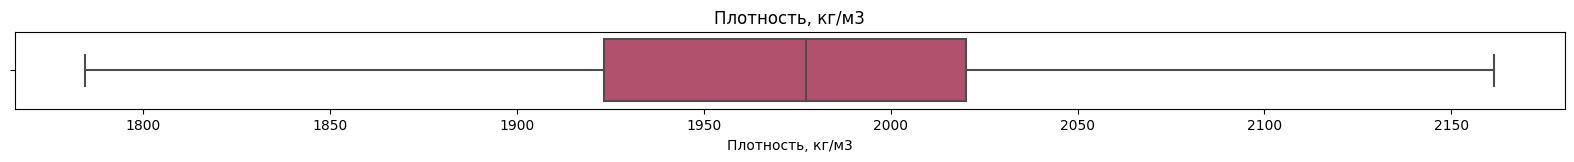

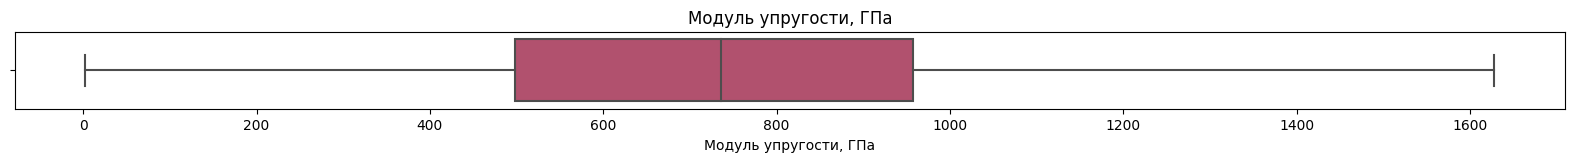

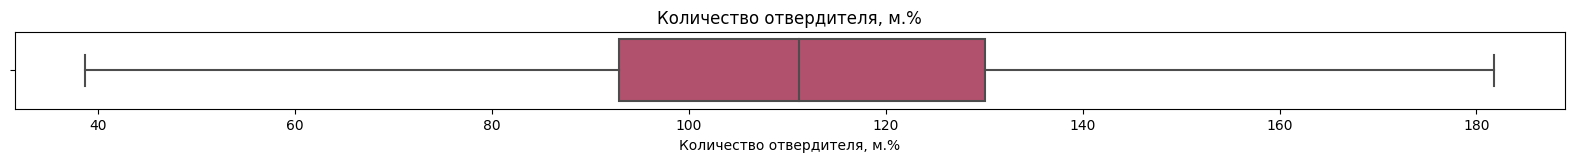

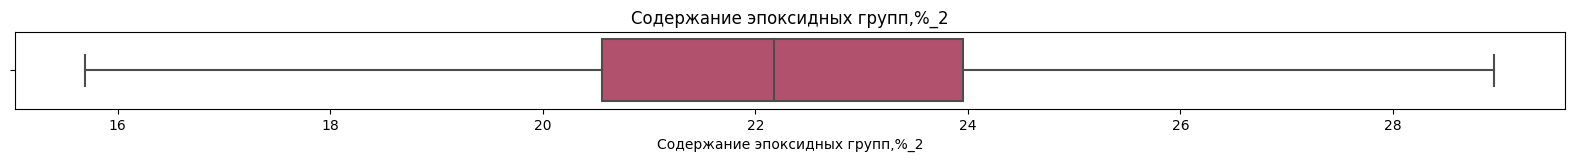

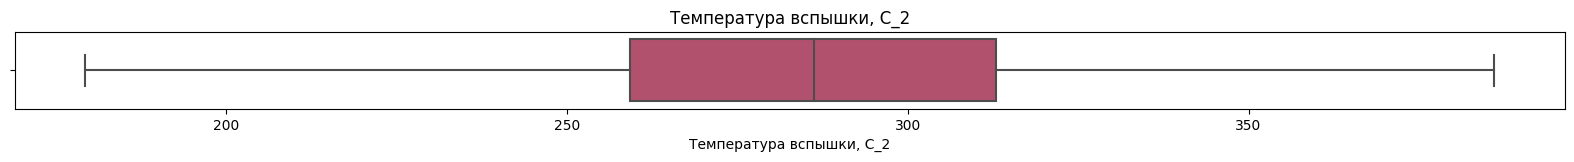

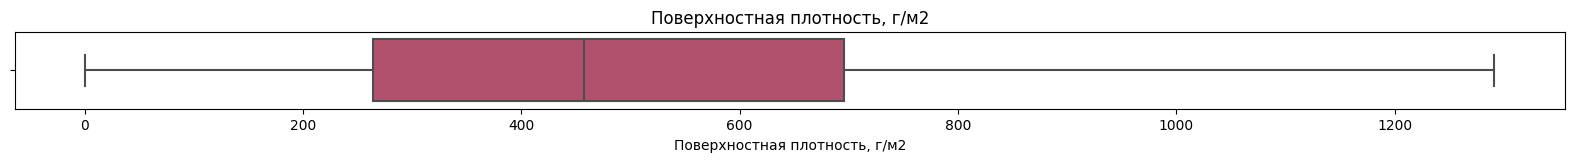

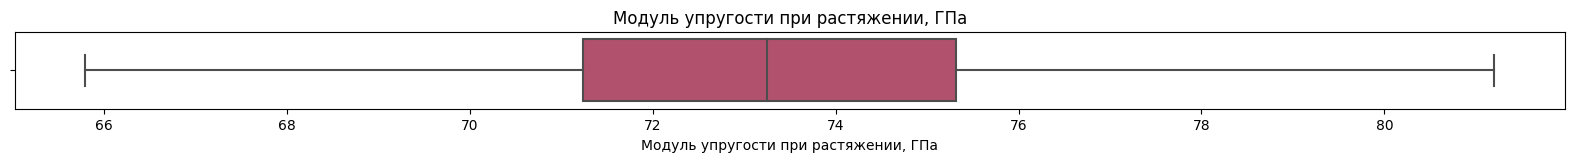

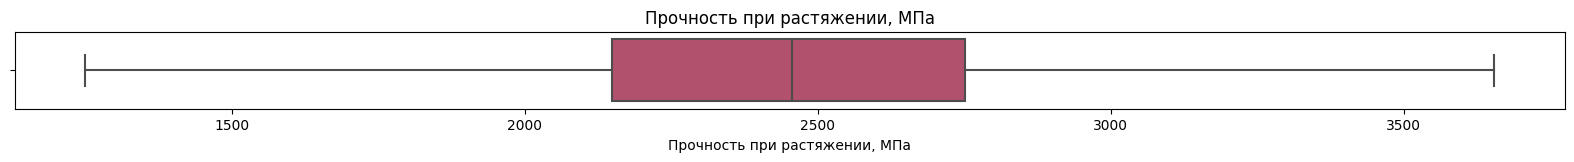

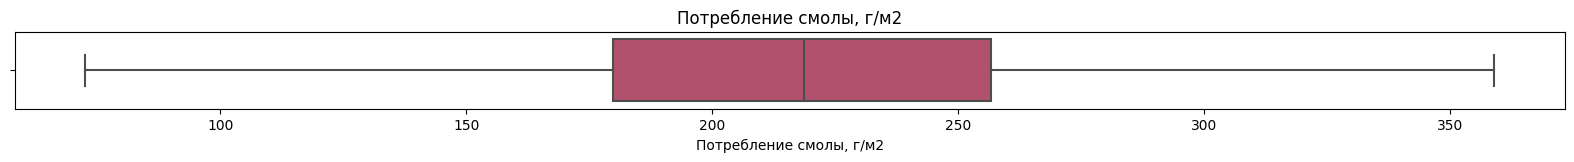

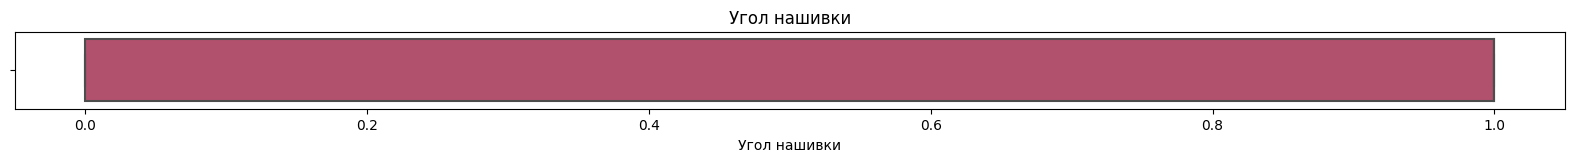

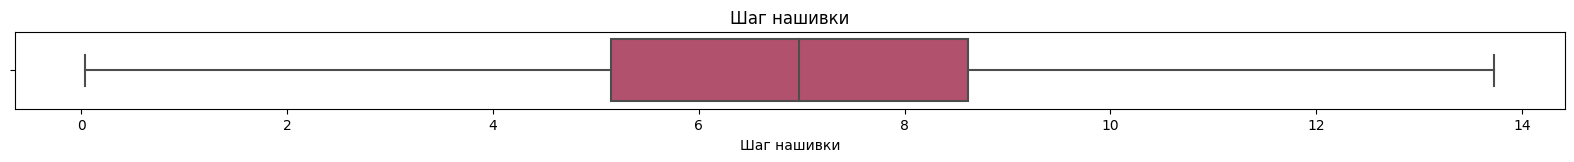

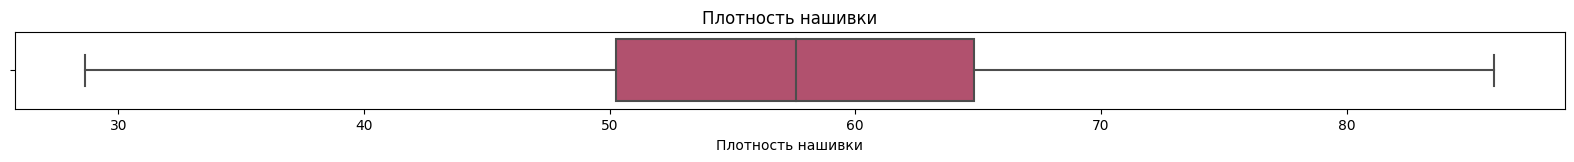

In [110]:
for column in df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'Модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки']]:
        plt.figure(figsize = (20,1))
        plt.title(column)
        sns.boxplot(data = df, x = column, palette = "flare")

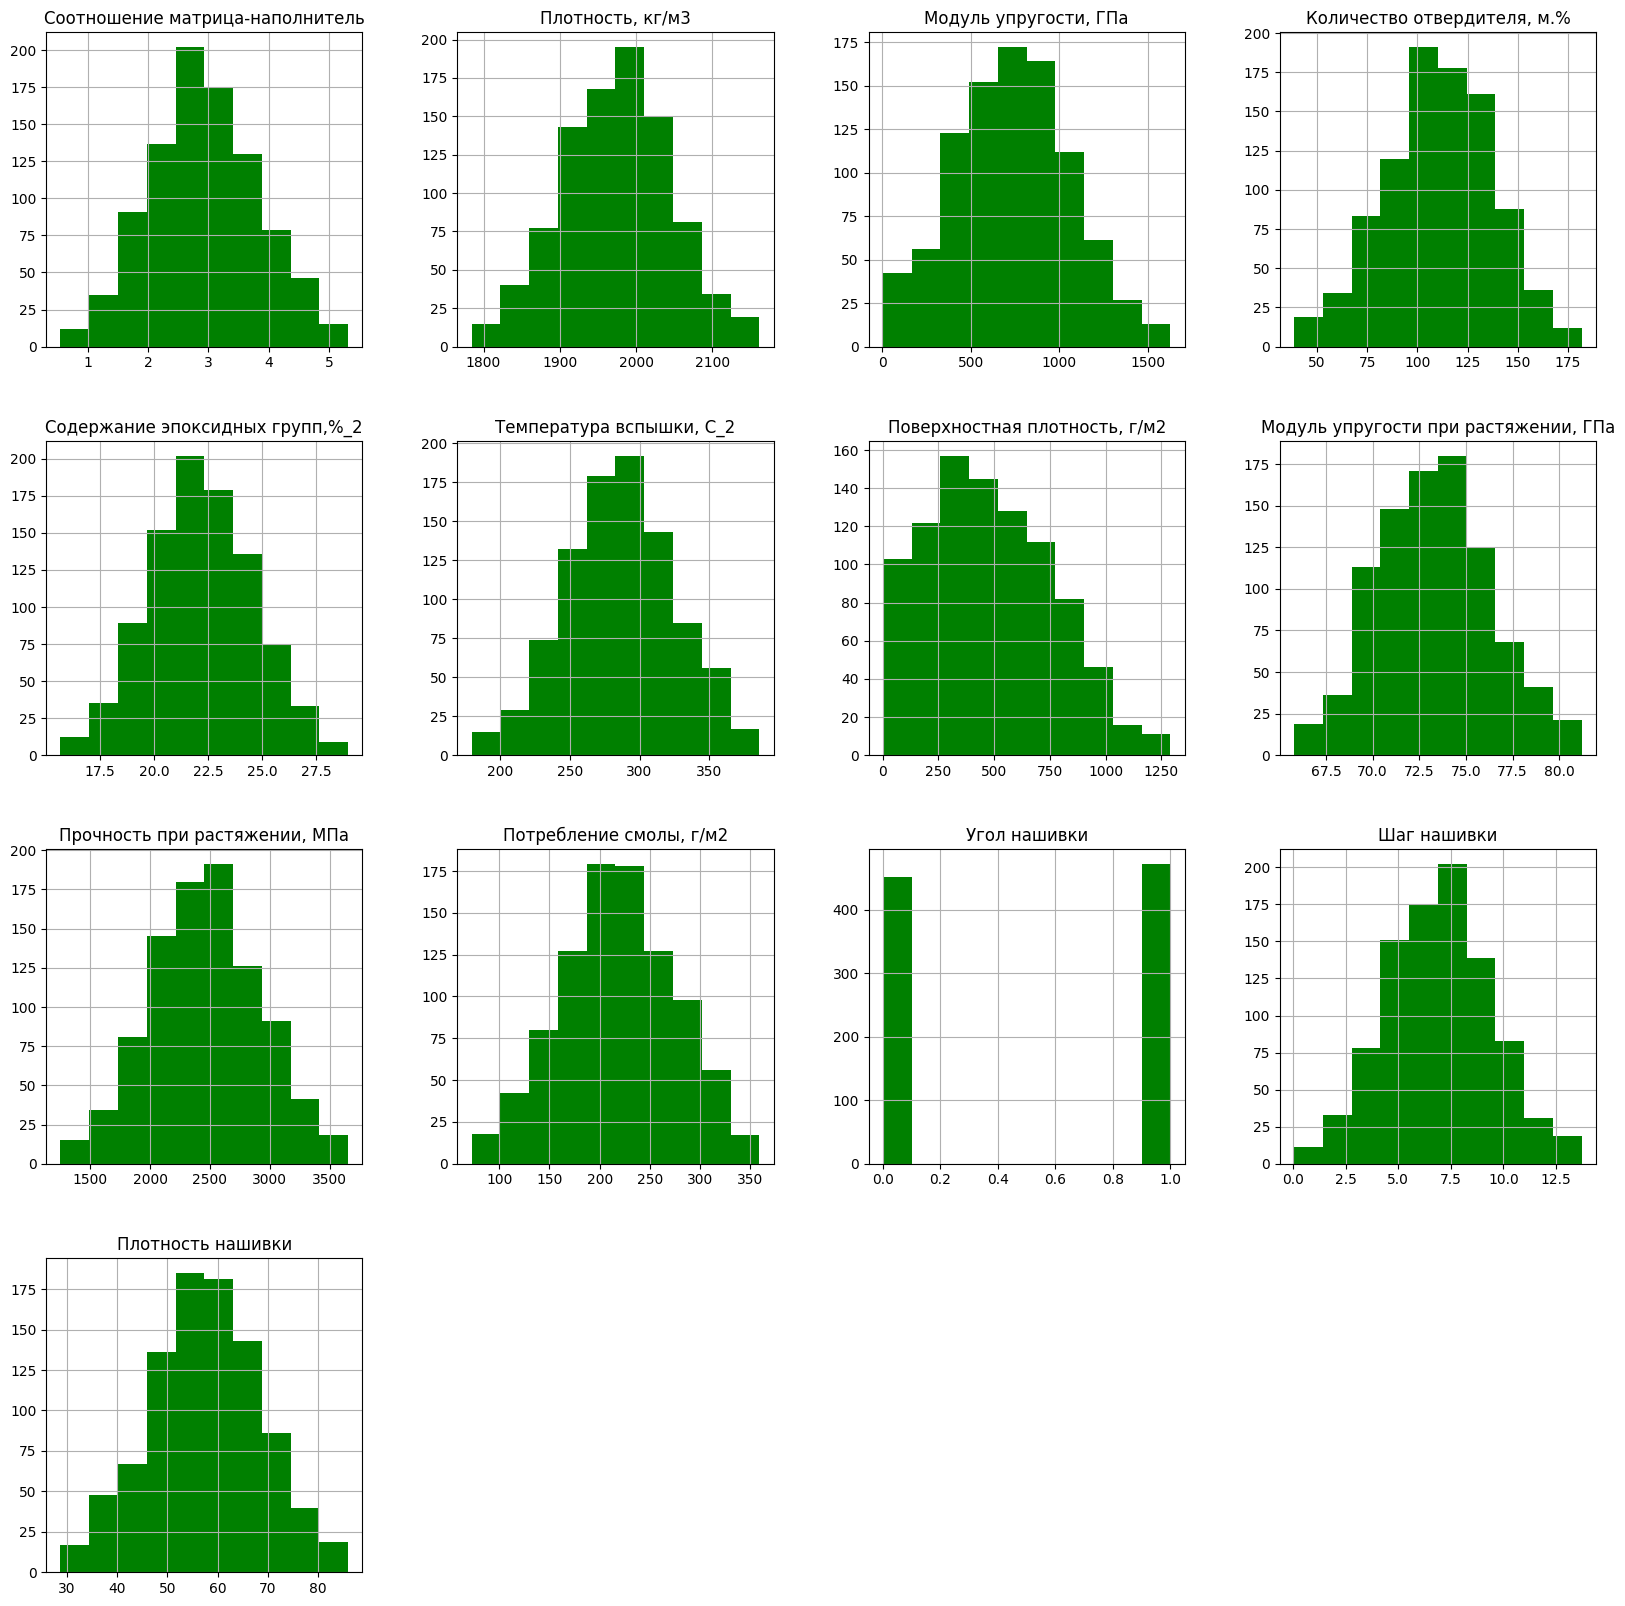

In [39]:
# Построим гистограммы распределения каждой из переменных без нормализации
df.hist(figsize = (20,20), color = "g")
plt.show()

Если сравнить с предыдущими гистограммами, разница видна не вооруженным глазом!!!

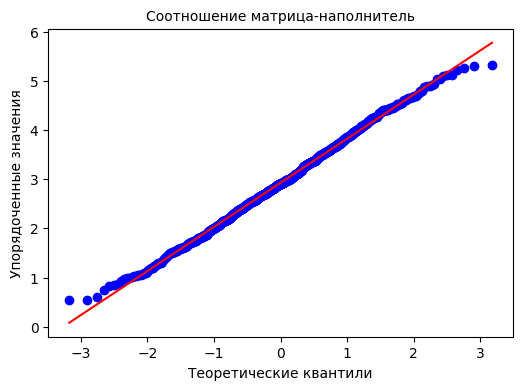

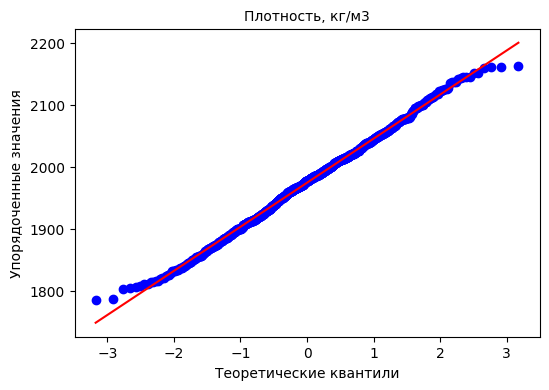

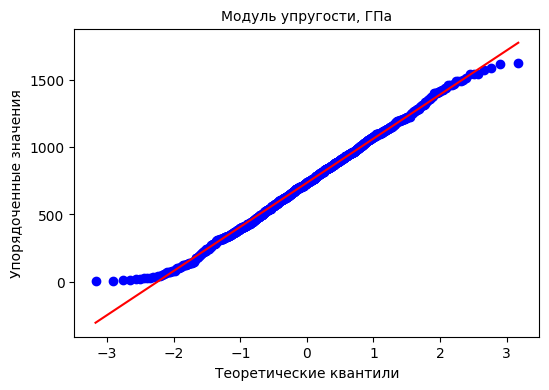

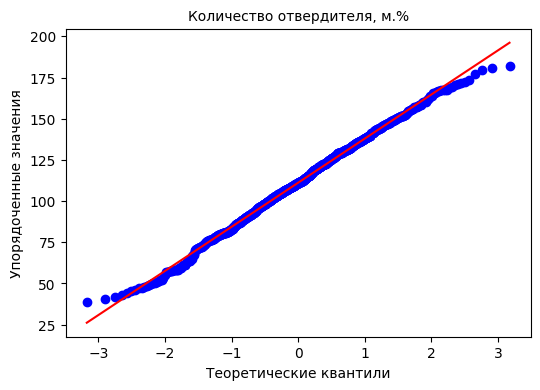

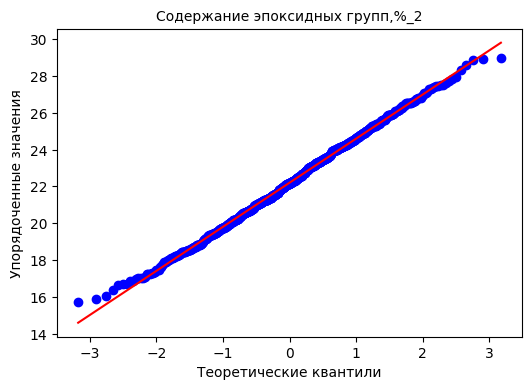

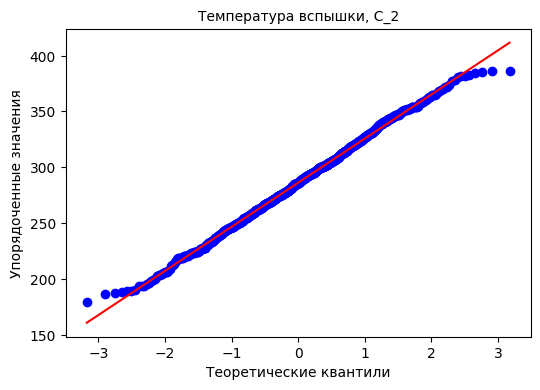

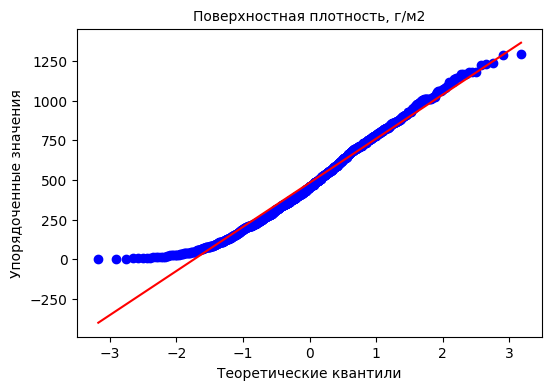

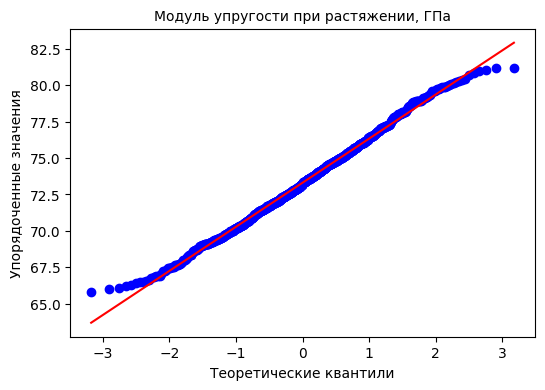

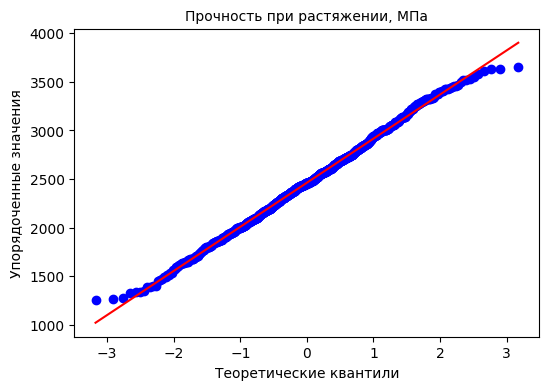

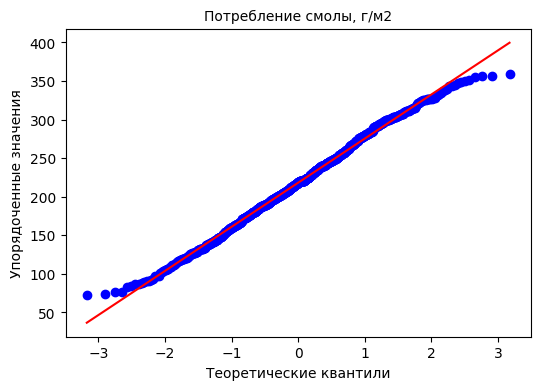

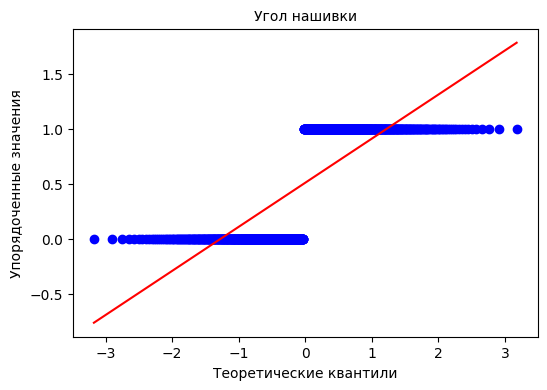

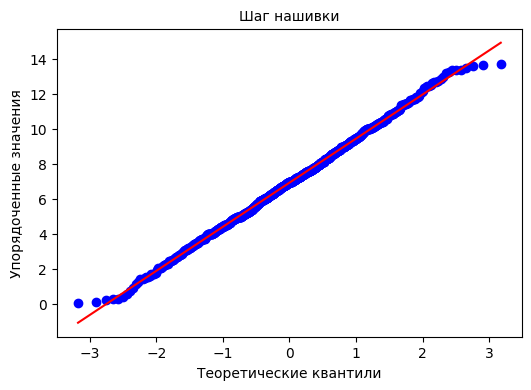

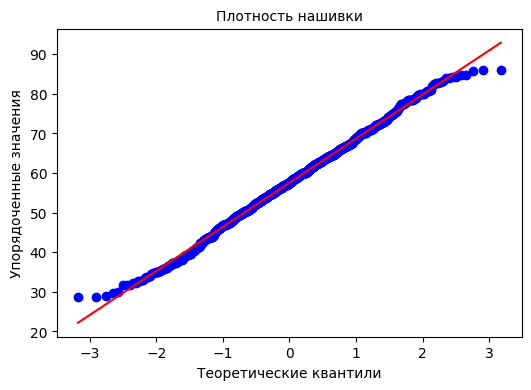

In [40]:
for i in df.columns:
    plt.figure(figsize = (6, 4))
    res = stats.probplot(df[i], plot = plt)
    plt.title(i, fontsize = 10)
    plt.xlabel("Теоретические квантили", fontsize = 10)
    plt.ylabel("Упорядоченные значения", fontsize = 10)
    plt.show()

Видим, что  наши точки не сильно отличаются от прямой, можно сказать точно лежат
на ней. Это подтверждает, что данные распределены с некоторым распределением, которое сильно от нормального не отличается.


#### *Нормализация данных*

У нас в основном количественные признаки, поэтому можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Т.к. это учебная работа, то сделаем и нормализацию, и стандартизацию.


<Axes: ylabel='Density'>

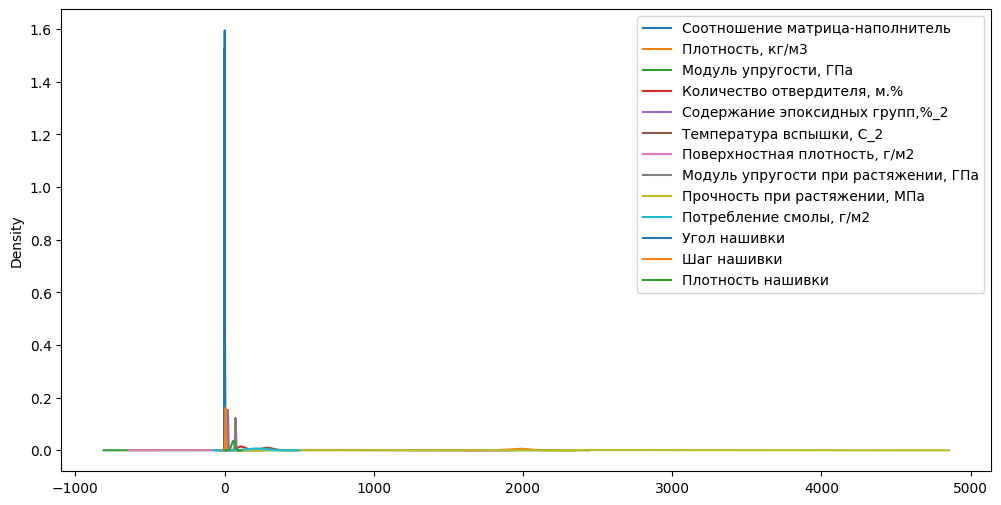

In [111]:
# На данный момент в нашем датасете всего 922 строки. Они все без выбросов, пропущенных значений, все имеют int или float.
fig, ax = plt.subplots(figsize = (12, 6))
df.plot(kind = 'kde', ax = ax)
# Оценка плотности ядра показывает, что наши данные находятся в разных диапазонах. А в связи с тем, что диапазоны очень разные, данные нужно нормализовать. Можем приступать к нормализации данных.

In [112]:
#Нормализуем данные с помощью MinMaxScaler()
scaler = preprocessing.MinMaxScaler()
col = df.columns
result = scaler.fit_transform(df)

df_minmax_n = pd.DataFrame(result, columns = col)
df_minmax_n.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


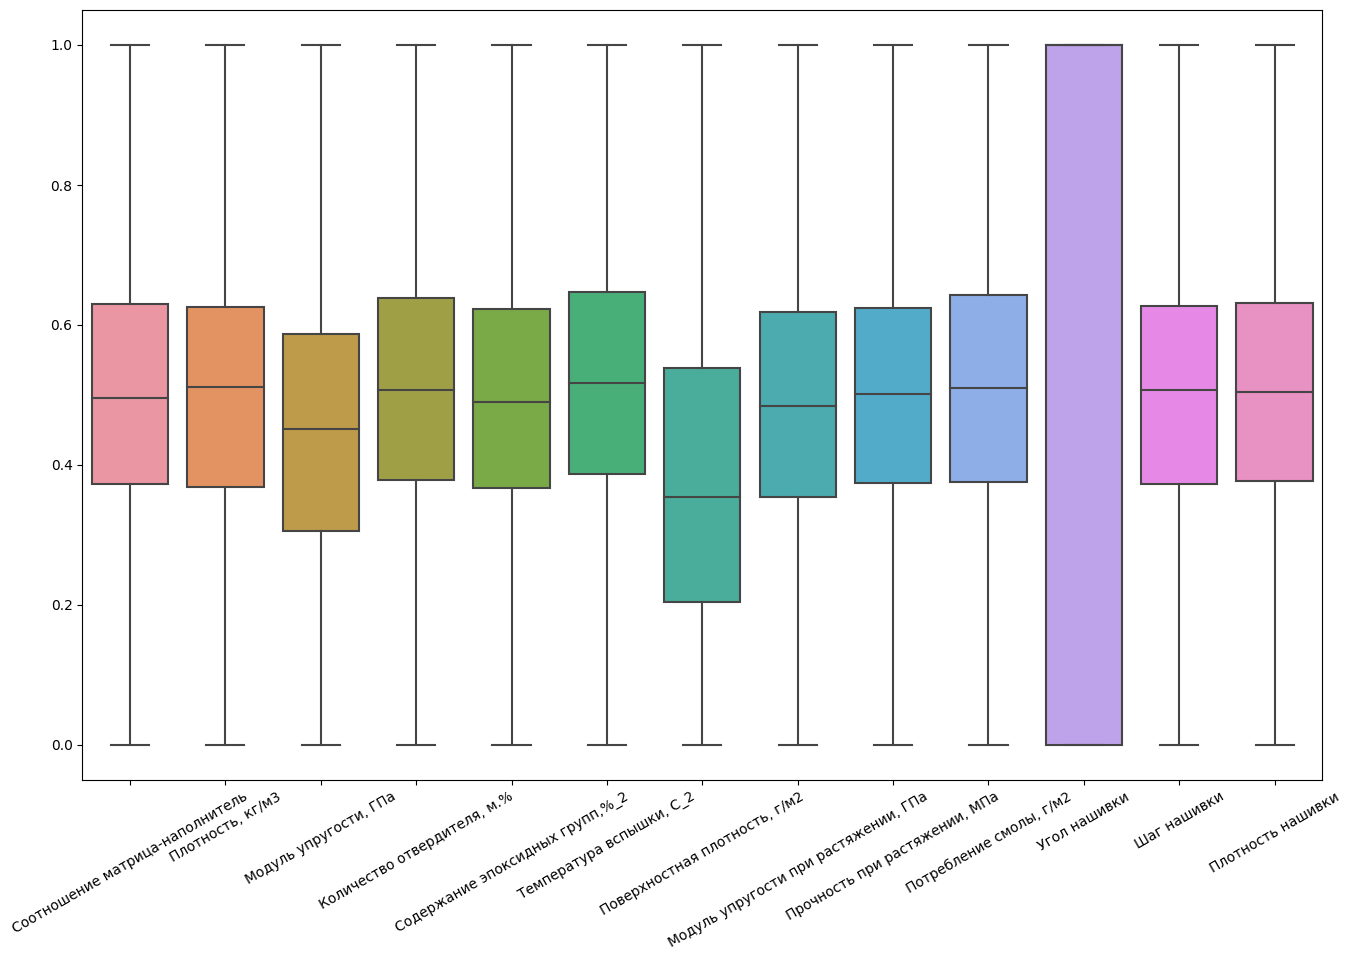

In [113]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

<Axes: ylabel='Density'>

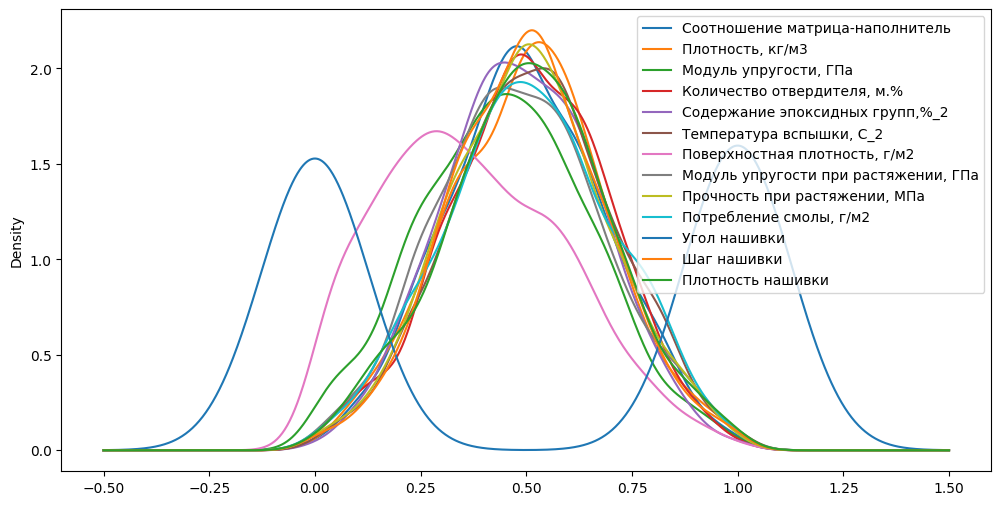

In [114]:
fig, ax = plt.subplots(figsize = (12, 6))
df_minmax_n.plot(kind = 'kde', ax = ax)

In [115]:
sns.pairplot(df_minmax_n, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette = 'RdBu')

Error in callback <function flush_figures at 0x7b548e804b80> (for post_execute):


KeyboardInterrupt: ignored

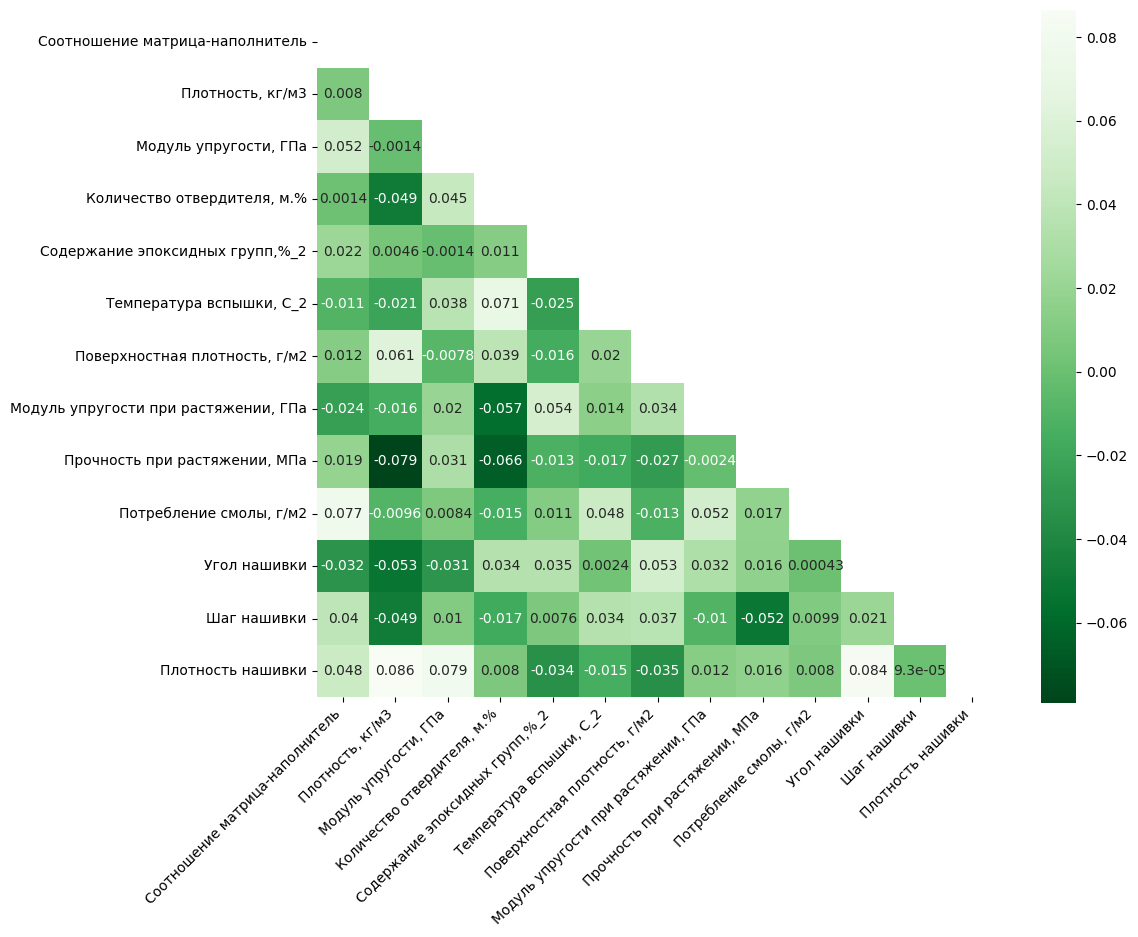

In [116]:
mask = np.triu(df_minmax_n.corr())
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(df_minmax_n.corr(), mask = mask, annot = True, square = True, cmap = 'Greens_r')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [117]:
#Нормализуем данные с помощью Normalizer()

normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
df_norm_n

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.000000,0.001075,0.016121
1,0.000499,0.545011,0.198335,0.034634,0.005705,0.080543,0.056380,0.018793,0.805435,0.059065,0.000000,0.001342,0.012618
2,0.000744,0.544829,0.202097,0.030022,0.005976,0.076388,0.056362,0.018787,0.805167,0.059046,0.000000,0.001342,0.015298
3,0.000746,0.539271,0.201687,0.030161,0.006004,0.076742,0.056623,0.018874,0.808906,0.059320,0.000000,0.001348,0.016178
4,0.000699,0.519919,0.219673,0.030449,0.006062,0.077475,0.057164,0.019055,0.816627,0.059886,0.000000,0.001361,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.000700,0.601751,0.281397,0.026816,0.006203,0.100115,0.064488,0.022531,0.735908,0.038535,0.000308,0.002798,0.014494
918,0.001078,0.641795,0.139227,0.045701,0.006136,0.079584,0.109777,0.022828,0.738938,0.036856,0.000313,0.003308,0.016827
919,0.000953,0.573123,0.121122,0.032118,0.006961,0.072186,0.215067,0.021716,0.773775,0.068752,0.000291,0.001209,0.019652
920,0.001192,0.664667,0.238453,0.045473,0.006190,0.088689,0.206291,0.023812,0.666248,0.063394,0.000322,0.002030,0.018736


<Axes: ylabel='Density'>

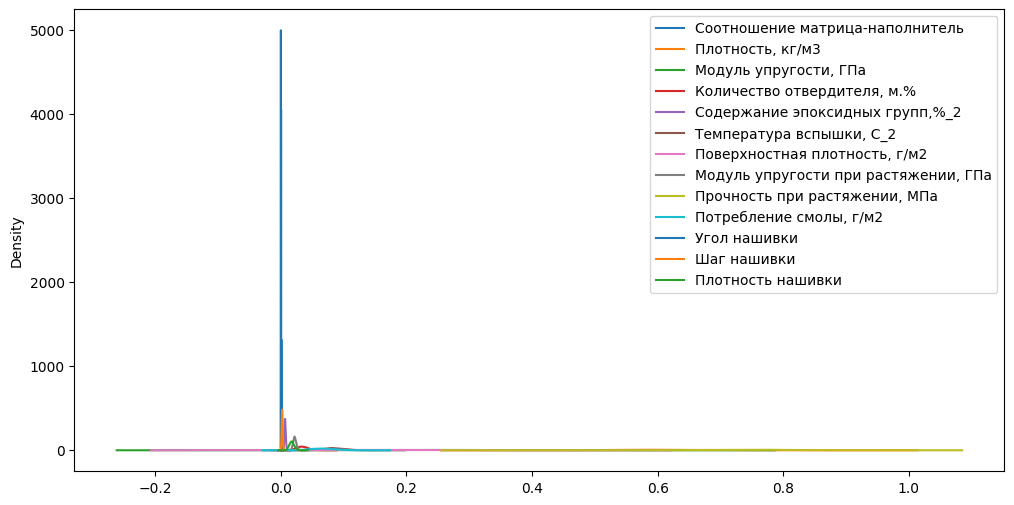

In [118]:
fig, ax = plt.subplots(figsize = (12, 6))
df_norm_n.plot(kind = 'kde', ax = ax)

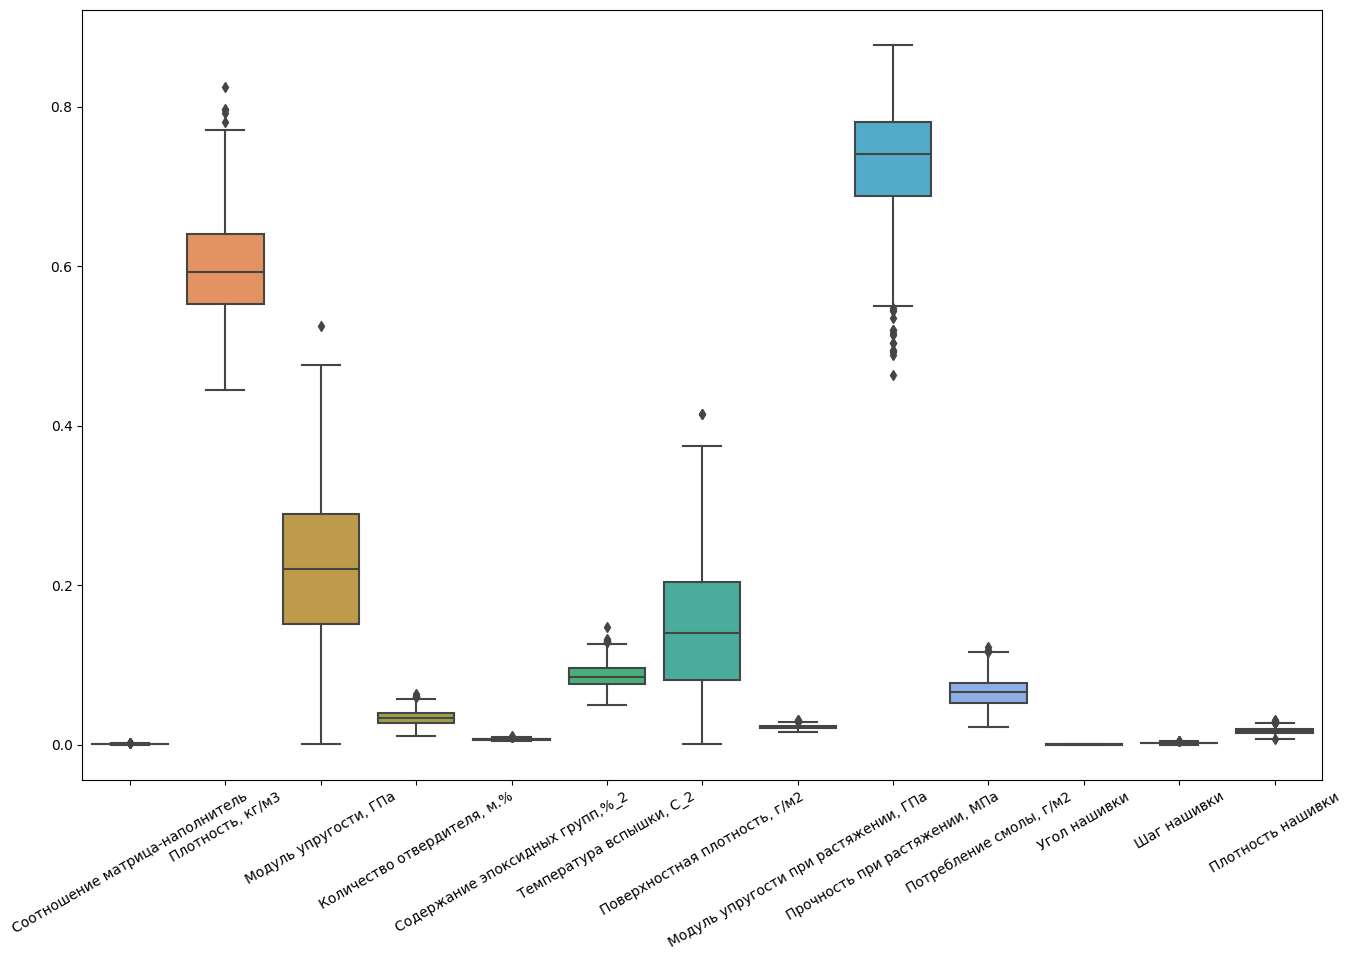

In [119]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df_norm_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

Визуализация графиков показывает, что нормализация при помощи "Normalizer" дает нам большое количество выбросов

In [120]:
#Сравним с данными до нормализации
df.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0,7.0,57.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,60.0
10,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,7.0,70.0
11,2.877358,1990.0,1628.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0,9.0,47.0


In [121]:
# Проверяем перевод данных из нормализованных в исходные
col = df_minmax_n.columns
result_reverse = scaler.inverse_transform(df_minmax_n)
initial_data = pd.DataFrame(result_reverse, columns = col)
initial_data.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
5,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0.0,7.0,47.0
6,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0.0,7.0,57.0
7,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,60.0
8,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,70.0
9,2.877358,1990.0,1628.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,9.0,47.0


In [122]:
#Рассмотрим несколько вариантов корреляции между параметрами после нормализации (первый вариант)
df_norm_n[df_norm_n.columns].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.281512,0.032460,0.137378,0.221541,0.180002,0.025513,0.262013,-0.257978,0.157659,-0.010611,0.136843,0.175839
"Плотность, кг/м3",0.281512,1.000000,-0.042233,0.390253,0.658281,0.564884,0.067392,0.875269,-0.837849,0.314219,0.082452,0.291974,0.445379
"Модуль упругости, ГПа",0.032460,-0.042233,1.000000,0.049364,-0.028060,0.003038,-0.026006,-0.026914,-0.386917,-0.009529,-0.039522,0.002268,0.044303
"Количество отвердителя, м.%",0.137378,0.390253,0.049364,1.000000,0.305395,0.311569,0.067273,0.376425,-0.379828,0.143166,0.064597,0.121374,0.203167
"Содержание эпоксидных групп,%_2",0.221541,0.658281,-0.028060,0.305395,1.000000,0.404877,0.027470,0.660206,-0.551282,0.244822,0.098492,0.236752,0.280886
"Температура вспышки, С_2",0.180002,0.564884,0.003038,0.311569,0.404877,1.000000,0.038395,0.563793,-0.509841,0.246410,0.063124,0.216858,0.260809
"Поверхностная плотность, г/м2",0.025513,0.067392,-0.026006,0.067273,0.027470,0.038395,1.000000,0.055252,-0.318775,0.007772,0.043869,0.065979,-0.017402
"Модуль упругости при растяжении, ГПа",0.262013,0.875269,-0.026914,0.376425,0.660206,0.563793,0.055252,1.000000,-0.741163,0.328966,0.109996,0.302476,0.416465
"Прочность при растяжении, МПа",-0.257978,-0.837849,-0.386917,-0.379828,-0.551282,-0.509841,-0.318775,-0.741163,1.000000,-0.282606,-0.058592,-0.279843,-0.379346
"Потребление смолы, г/м2",0.157659,0.314219,-0.009529,0.143166,0.244822,0.246410,0.007772,0.328966,-0.282606,1.000000,0.033128,0.116685,0.140756


In [123]:
#Рассмотрим второй вариант корреляции между параметрами после нормализации (второй вариант)
df_minmax_n[df_minmax_n.columns].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.007996,0.051643,0.001353,0.021982,-0.010565,0.011910,-0.024316,0.019141,0.076857,-0.032144,0.039924,0.047835
"Плотность, кг/м3",0.007996,1.000000,-0.001416,-0.048938,0.004568,-0.021256,0.061496,-0.015597,-0.079188,-0.009609,-0.052993,-0.048648,0.086460
"Модуль упругости, ГПа",0.051643,-0.001416,1.000000,0.044550,-0.001442,0.037622,-0.007805,0.020063,0.031041,0.008368,-0.031490,0.010238,0.078810
"Количество отвердителя, м.%",0.001353,-0.048938,0.044550,1.000000,0.011429,0.070623,0.038762,-0.057026,-0.065711,-0.014827,0.034103,-0.017394,0.007981
"Содержание эпоксидных групп,%_2",0.021982,0.004568,-0.001442,0.011429,1.000000,-0.025315,-0.015844,0.053887,-0.013099,0.010808,0.034520,0.007571,-0.034481
"Температура вспышки, С_2",-0.010565,-0.021256,0.037622,0.070623,-0.025315,1.000000,0.020307,0.014168,-0.017263,0.048142,0.002371,0.034395,-0.015014
"Поверхностная плотность, г/м2",0.011910,0.061496,-0.007805,0.038762,-0.015844,0.020307,1.000000,0.033526,-0.027320,-0.012606,0.053180,0.036931,-0.034989
"Модуль упругости при растяжении, ГПа",-0.024316,-0.015597,0.020063,-0.057026,0.053887,0.014168,0.033526,1.000000,-0.002393,0.051676,0.031910,-0.010193,0.012488
"Прочность при растяжении, МПа",0.019141,-0.079188,0.031041,-0.065711,-0.013099,-0.017263,-0.027320,-0.002393,1.000000,0.016753,0.016144,-0.051580,0.016311
"Потребление смолы, г/м2",0.076857,-0.009609,0.008368,-0.014827,0.010808,0.048142,-0.012606,0.051676,0.016753,1.000000,0.000433,0.009932,0.008012


#### Стандартизируем данные

In [124]:
X1 = df_minmax_n.copy()
X2 = df_norm_n.copy()

In [125]:
df_std_X1 = preprocessing.StandardScaler().fit(X1)
df_standart_X1 = df_std_X1.transform(X1)
df_standart_1 = pd.DataFrame(df_standart_X1)

<Axes: ylabel='Density'>

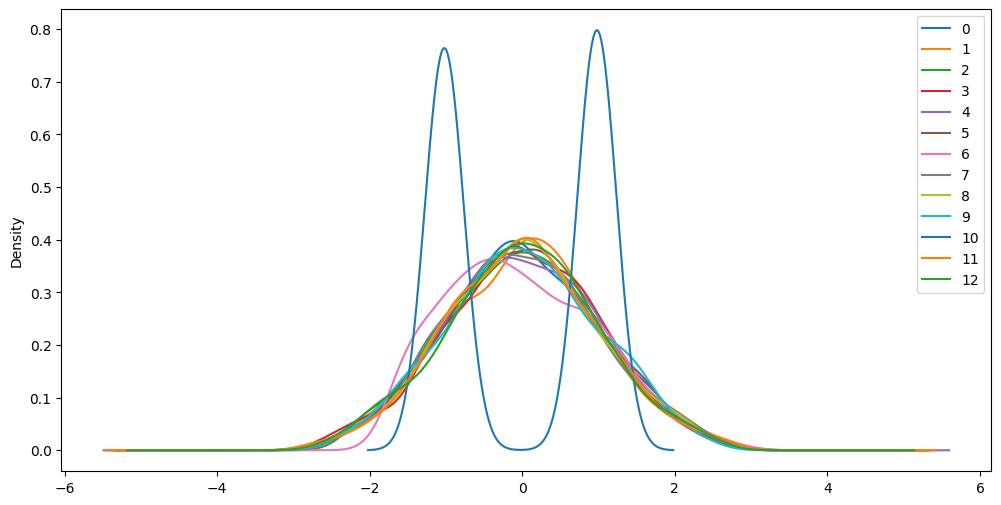

In [127]:
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_1.plot(kind = 'kde', ax = ax)

In [128]:
df_standart_1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.196467,0.787037,0.007992,-2.286425,0.647585,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-1.166792,0.219240
1,-1.196467,0.787037,0.007992,0.668092,-0.397291,0.350738,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,-0.950227
2,-0.175012,0.787037,0.051553,0.027074,0.028123,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,-0.050637
3,-0.178825,0.364514,0.036283,0.027074,0.028123,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,0.219240
4,-0.400390,-0.903054,0.216474,0.027074,0.028123,-0.039740,-0.971971,-1.092335,1.187925,0.034181,-1.021932,-0.768833,1.118831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,-0.733662,-0.310284,0.539767,-0.902956,-0.868217,0.979545,-0.974830,-0.070267,-0.163679,-1.629244,0.978538,0.853400,-0.948449
918,0.576611,1.069974,-0.889924,1.303201,-1.087006,-0.811326,-0.470122,-0.126524,-0.223019,-1.756683,0.978538,1.446055,-0.342933
919,0.394018,-0.024589,-0.975122,-0.022536,0.734311,-0.958342,0.919470,0.473140,0.444312,0.324984,0.978538,-1.102660,0.905599
920,0.868603,1.305328,0.016356,1.131763,-1.234469,-0.263996,0.567419,0.244441,-0.859827,-0.366368,0.978538,-0.246233,0.062808


In [129]:
df_std_X2 = preprocessing.StandardScaler().fit(X2)
df_standart_X2 = df_std_X2.transform(X2)
df_standart_2 = pd.DataFrame(df_standart_X2)

<Axes: ylabel='Density'>

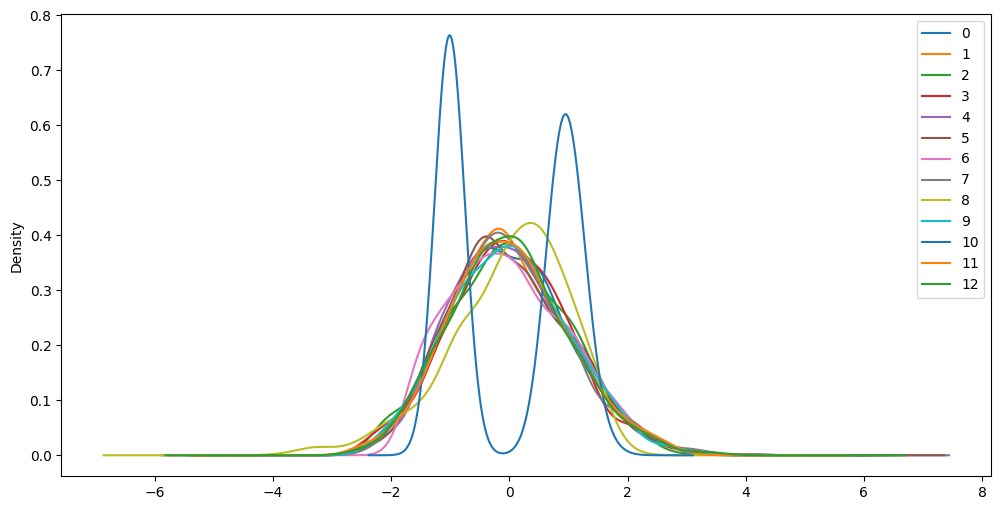

In [130]:
fig, ax = plt.subplots(figsize = (12, 6))
df_standart_2.plot(kind = 'kde', ax=ax)

In [ ]:
df_standart_2

In [ ]:
mask = np.triu(X1.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X1.corr(), mask=mask, annot=True, square=True, cmap='Greens_r')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
mask = np.triu(X2.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X2.corr(), mask=mask, annot=True, square=True, cmap='Greens_r')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df_norm_n.describe()

In [ ]:
df_minmax_n.describe()

# CatBoost

In [131]:
def error(y_true, y_pred):
    print(f'{mean_absolute_error(y_true, y_pred)=}')
    print(f'{mean_absolute_percentage_error(y_true, y_pred)=}')
    print(f'{mean_squared_error(y_true, y_pred)=}')
# ошибки

In [132]:
#Нормализация with MinMaxScaler

transformer = MinMaxScaler().fit(df)
col = df.columns
processed = transformer.transform(df)
df_norm = pd.DataFrame(processed, columns = col, index=df.index)
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
1,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.289334,0.546433
3,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.319758
4,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.494123
5,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.546433
6,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.720799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361662,0.444480,0.560064,0.337550,0.333908,0.703458,0.161609,0.473553,0.472912,0.183151,1.0,0.660014,0.320103
1019,0.607674,0.704373,0.272088,0.749605,0.294428,0.362087,0.271207,0.462512,0.461722,0.157752,1.0,0.768759,0.437468
1020,0.573391,0.498274,0.254927,0.501991,0.623085,0.334063,0.572959,0.580201,0.587558,0.572648,1.0,0.301102,0.679468
1021,0.662497,0.748688,0.454635,0.717585,0.267818,0.466417,0.496511,0.535317,0.341643,0.434855,1.0,0.458245,0.516112


In [133]:
!pip install catboost
from catboost import CatBoostRegressor

In [134]:
parametrs = {'eval_metric': 'MAPE',
             'random_seed':42,
             'verbose': 100}
# метрики модели

In [135]:
#делим на фиги и таргет
X = df_norm.copy()
y = X.pop('Соотношение матрица-наполнитель')

In [136]:
#Разбиваем выборку на Тестир, валидац и тест часть
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [137]:
model_regressor = CatBoostRegressor(**parametrs)

In [138]:
model_regressor.fit(X_train_val, y_train_val, eval_set=(X_val, y_val), early_stopping_rounds=100)

Learning rate set to 0.044937
0:	learn: 0.1526770	test: 0.1468063	best: 0.1468063 (0)	total: 10.5ms	remaining: 10.5s
100:	learn: 0.1134444	test: 0.1485606	best: 0.1468063 (0)	total: 848ms	remaining: 7.54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1468062634
bestIteration = 0

Shrink model to first 1 iterations.


In [139]:
model_regressor.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

Learning rate set to 0.047533
0:	learn: 0.1509135	test: 0.1491535	best: 0.1491535 (0)	total: 12.8ms	remaining: 12.8s
100:	learn: 0.1155865	test: 0.1516886	best: 0.1488978 (16)	total: 798ms	remaining: 7.11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1488977782
bestIteration = 16

Shrink model to first 17 iterations.


In [140]:
y_pred = model_regressor.predict(X_test)

In [141]:
error(y_test, y_pred)

mean_absolute_error(y_true, y_pred)=0.14889777905126275
mean_absolute_percentage_error(y_true, y_pred)=0.4720378923031988
mean_squared_error(y_true, y_pred)=0.03361378185169503


In [142]:
X_test.insert(0, 'pred', y_pred)
X_test.head()

,pred,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
360,0.501374,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.387108,0.381499,0.622262,0.0,0.706867,0.419113
427,0.501755,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.742719,0.605408,0.528535,0.0,0.536400,0.710983
611,0.489014,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.364855,0.708160,0.347209,1.0,0.425178,0.579405
336,0.494502,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.435807,0.438781,0.443355,0.0,0.741162,0.504853
604,0.501557,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.468100,0.061865,0.307091,1.0,0.746784,0.785982


In [143]:
transformer.inverse_transform(X_test)

array([[2.93731609e+00, 2.01320886e+03, 4.29919092e+02, ...,
        0.00000000e+00, 9.71802281e+00, 5.26981070e+01],
       [2.93913267e+00, 2.00019300e+03, 7.51441920e+02, ...,
        0.00000000e+00, 7.38351634e+00, 6.94370477e+01],
       [2.87840215e+00, 2.11098559e+03, 3.16084692e+01, ...,
        1.00000000e+00, 5.86035719e+00, 6.18909518e+01],
       ...,
       [2.91373869e+00, 1.98937338e+03, 1.20976842e+03, ...,
        1.00000000e+00, 1.10518485e+01, 6.37098164e+01],
       [2.88503099e+00, 1.96155008e+03, 1.49032012e+03, ...,
        1.00000000e+00, 3.98352026e+00, 4.64274628e+01],
       [2.92428356e+00, 1.91564277e+03, 4.72313295e+02, ...,
        0.00000000e+00, 4.99665393e+00, 5.45137155e+01]])

In [145]:
col = X_test.columns
X_test_1 = pd.DataFrame(transformer.inverse_transform(X_test), columns = col, index=X_test.index)
X_test_1.insert(1, 'Соотношение матрица-наполнитель', df.loc[X_test_1.index.tolist()]['Соотношение матрица-наполнитель'], allow_duplicates = False)
display(X_test_1.head())
error(X_test_1['pred'], X_test_1['Соотношение матрица-наполнитель'])

,pred,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
360,2.937316,2.097010,2013.208862,429.919092,62.743272,23.961233,248.849293,322.220632,71.758909,2167.533030,250.822178,0.0,9.718023,52.698107
427,2.939133,4.073344,2000.192995,751.441920,131.529481,22.208465,283.432980,73.430795,77.238628,2705.819718,223.967368,0.0,7.383516,69.437048
611,2.878402,1.647649,2110.985588,31.608469,101.935506,19.462720,242.918105,688.874406,71.416004,2952.839631,172.013665,1.0,5.860357,61.890952
336,2.904558,3.391009,2023.785804,723.921402,136.901365,21.650138,327.402856,726.627740,72.509332,2305.241225,199.561589,0.0,10.187672,57.615327
604,2.938190,3.578784,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,73.006935,1399.118555,160.519027,1.0,10.264664,73.738350


mean_absolute_error(y_true, y_pred)=0.7097588870018294
mean_absolute_percentage_error(y_true, y_pred)=0.24265465600262826
mean_squared_error(y_true, y_pred)=0.7637700349327495


# Saving the trained model



In [146]:
import pickle

with open('model_regressor.sav', 'wb') as f:
    pickle.dump(model_regressor, f)
# сохранение самой модели

In [147]:
with open('model_regressor.sav', 'rb') as f:
    model_regressor_1 = pickle.load(f)
# загрузка самой модели

In [148]:
with open('transformer.sav', 'wb') as f:
    pickle.dump(transformer, f)
# сохранение нормализатора

In [149]:
model_regressor.fit(df_norm.drop('Соотношение матрица-наполнитель', axis=1), df_norm['Соотношение матрица-наполнитель'])

Learning rate set to 0.040421
0:	learn: 0.1504343	total: 7.22ms	remaining: 7.21s
100:	learn: 0.1277371	total: 719ms	remaining: 6.4s
200:	learn: 0.1102015	total: 1.4s	remaining: 5.58s
300:	learn: 0.0958776	total: 1.87s	remaining: 4.35s
400:	learn: 0.0825160	total: 2.19s	remaining: 3.27s
500:	learn: 0.0709292	total: 2.52s	remaining: 2.51s
600:	learn: 0.0617541	total: 2.86s	remaining: 1.9s
700:	learn: 0.0541454	total: 3.17s	remaining: 1.35s
800:	learn: 0.0475761	total: 3.5s	remaining: 870ms
900:	learn: 0.0421620	total: 3.82s	remaining: 420ms
999:	learn: 0.0374432	total: 4.12s	remaining: 0us


# Нейронные сети

In [150]:
dfpm = df_norm.copy(deep = True)
# делаем копию

In [152]:
#Входные и выходные данные
inputcol = ["Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2"
               ,"Потребление смолы, г/м2",
        "Угол нашивки","Шаг нашивки","Плотность нашивки"]
result1 = ['Соотношение матрица-наполнитель']
result2 = ['Модуль упругости при растяжении, ГПа']
result3 = ['Прочность при растяжении, МПа']
X_train = dfpm[inputcol]
y_train1 = dfpm[result1]
y_train2 = dfpm[result2]
y_train3 = dfpm[result3]

In [153]:

Xtrn1, Xtest1, Ytrn1, Ytest1 = train_test_split(X_train, y_train1, test_size=0.3, random_state=42)
Xtrn2, Xtest2, Ytrn2, Ytest2 = train_test_split(X_train, y_train2, test_size=0.3, random_state=42)
Xtrn3, Xtest3, Ytrn3, Ytest3 = train_test_split(X_train, y_train3, test_size=0.3, random_state=42)

## Предсказание параметра "Соотношение матрица-наполнитель"

In [158]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn1.shape[1],)))
    model.add(layers.Dense(64, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # выбрать метрику
    return model
# строим модель

In [159]:
k = 4
num_val_samples = len(Xtrn1) // k
num_epochs = 50
all_scores = []
for i in range(k):
    print('processing fold #', i)

    val_data = Xtrn1[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Ytrn1[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [Xtrn1[:i * num_val_samples],
         Xtrn1[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Ytrn1[:i * num_val_samples],
         Ytrn1[(i + 1) * num_val_samples:]],
        axis=0)


    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [160]:
all_scores

[0.15801304578781128,
 0.16864611208438873,
 0.15194670855998993,
 0.15581342577934265]

In [161]:
np.mean(all_scores)

0.15860482305288315

In [162]:

num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #%d' % i)
    val_data = Xtrn1[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Ytrn1[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [Xtrn1[:i * num_val_samples],
         Xtrn1[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Ytrn1[:i * num_val_samples],
         Ytrn1[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


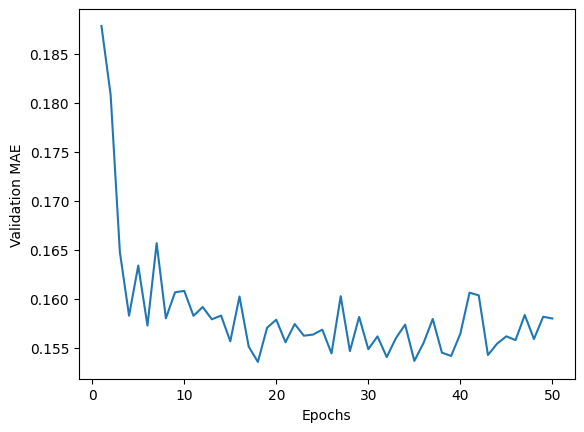

In [163]:

average_mae_history =[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

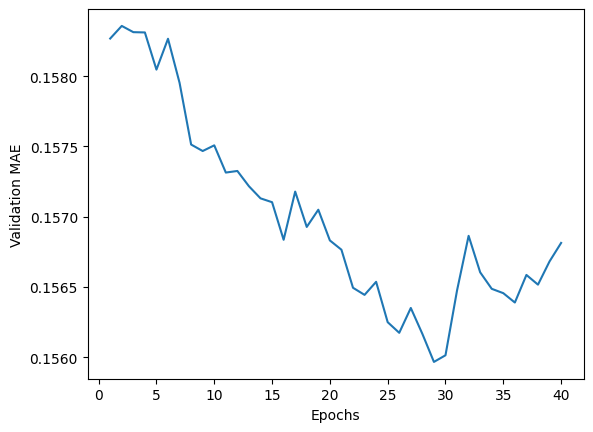

In [164]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [165]:

model= build_model()

model.fit(Xtrn1, Ytrn1,
         epochs=30, batch_size=4, verbose=1)
test_mse_score, test_mae_score = model.evaluate(Xtest1, Ytest1)



Epoch 1/30
162/162 [==============================] - 1s 2ms/step - loss: 0.0543 - mae: 0.1862
Epoch 2/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0505 - mae: 0.1813
Epoch 3/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0492 - mae: 0.1772
Epoch 4/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0475 - mae: 0.1780
Epoch 5/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0444 - mae: 0.1695
Epoch 6/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1687
Epoch 7/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0412 - mae: 0.1625
Epoch 8/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0427 - mae: 0.1644
Epoch 9/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0410 - mae: 0.1628
Epoch 10/30
162/162 [==============================] - 0s 2ms/step - loss: 0.0405 - mae: 0.1612
Epoch 11/30
162/162 [============================

In [166]:
test_mae_score

0.15467365086078644

In [167]:
y_pred1 = model.predict(Xtest1)

error(y_pred1, Ytest1)
Xtest1

9/9 [==============================] - 0s 2ms/step
mean_absolute_error(y_true, y_pred)=0.15467366009702938
mean_absolute_percentage_error(y_true, y_pred)=0.3298139563905031
mean_squared_error(y_true, y_pred)=0.036316160658673095


,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
360,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.622262,0.0,0.706867,0.419113
427,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.528535,0.0,0.536400,0.710983
611,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.347209,1.0,0.425178,0.579405
336,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.443355,0.0,0.741162,0.504853
604,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.307091,1.0,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...
479,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.445939,0.0,0.401549,0.717647
149,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.672341,0.0,0.291997,0.552182
561,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.493243,1.0,0.804264,0.611119
632,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.135191,1.0,0.288131,0.309775


## Предсказание параметра "Модуль упругости при растяжении, ГПа"

In [168]:
def build_model2():
    model2=models.Sequential()
    model2.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn2.shape[1],)))
    model2.add(layers.Dense(64, activation='tanh'))
    model2.add(layers.Dense(1))
    model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model2

In [169]:
k2 = 4
num_val_samples2 = len(Xtrn2) // k2
num_epochs2 = 50
all_scores2 = []
for i2 in range(k2):
    print('processing fold #', i2)

    val_data2 = Xtrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]
    val_targets2 = Ytrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]

    partial_train_data2 = np.concatenate(
        [Xtrn2[:i2 * num_val_samples2],
         Xtrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    partial_train_targets2 = np.concatenate(
        [Ytrn2[:i2 * num_val_samples2],
         Ytrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)


    model2 = build_model2()

    model2.fit(partial_train_data2, partial_train_targets2,
              epochs=num_epochs2, batch_size=1, verbose=0)

    val_mse2, val_mae2 = model2.evaluate(val_data2, val_targets2, verbose=0)
    all_scores2.append(val_mae2)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [170]:
all_scores2

[0.15793351829051971,
 0.17294786870479584,
 0.16453270614147186,
 0.1490662842988968]

In [171]:
np.mean(all_scores2)

0.16112009435892105

In [172]:
num_epochs2 = 50
all_mae_histories2 = []
for i2 in range(k2):
    print('processing fold #%d' % i2)
    val_data2 = Xtrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]
    val_targets2 = Ytrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]
    partial_train_data2 = np.concatenate(
        [Xtrn2[:i2 * num_val_samples2],
         Xtrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    partial_train_targets2 = np.concatenate(
        [Ytrn2[:i2 * num_val_samples2],
         Ytrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    model2 = build_model2()
    history2 = model2.fit(partial_train_data2, partial_train_targets2,
                        validation_data=(val_data2, val_targets2),
                        epochs=num_epochs2, batch_size=1, verbose=0)
    mae_history2 = history2.history['val_mae']
    all_mae_histories2.append(mae_history2)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


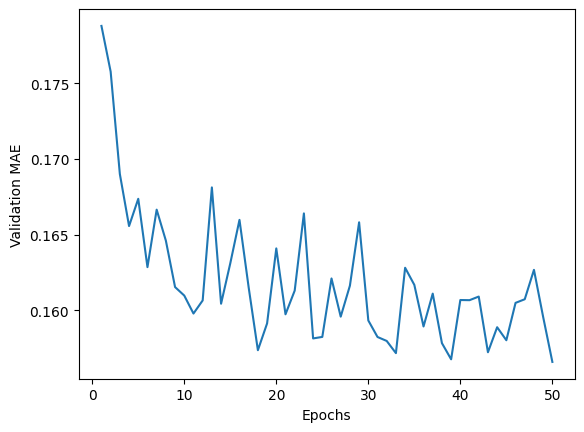

In [173]:

average_mae_history2 =[
    np.mean([x[i] for x in all_mae_histories2]) for i in range(num_epochs2)
]
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

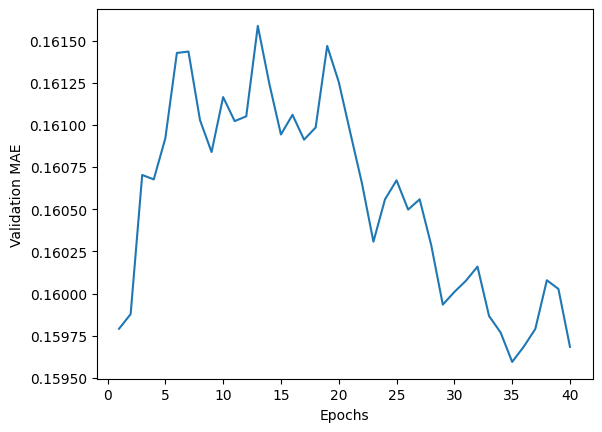

In [174]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history2 = smooth_curve(average_mae_history2[10:])
plt.plot(range(1, len(smooth_mae_history2) + 1), smooth_mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [175]:

model2= build_model2()

model2.fit(Xtrn2, Ytrn2,
         epochs=27, batch_size=4, verbose=1)
test_mse_score2, test_mae_score2 = model2.evaluate(Xtest2, Ytest2)

Epoch 1/27
162/162 [==============================] - 1s 2ms/step - loss: 0.0607 - mae: 0.1889
Epoch 2/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0483 - mae: 0.1800
Epoch 3/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0482 - mae: 0.1775
Epoch 4/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0460 - mae: 0.1730
Epoch 5/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1673
Epoch 6/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0438 - mae: 0.1672
Epoch 7/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0423 - mae: 0.1644
Epoch 8/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0413 - mae: 0.1617
Epoch 9/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0418 - mae: 0.1644
Epoch 10/27
162/162 [==============================] - 0s 2ms/step - loss: 0.0425 - mae: 0.1634
Epoch 11/27
162/162 [============================

In [176]:
test_mae_score2

0.1693398505449295

In [177]:
y_pred2 = model2.predict(Xtest2)

error(y_pred2, Ytest2)
Xtest2

9/9 [==============================] - 0s 3ms/step
mean_absolute_error(y_true, y_pred)=0.16933984051843853
mean_absolute_percentage_error(y_true, y_pred)=0.3168551341752015
mean_squared_error(y_true, y_pred)=0.04480305571478598


,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
360,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.622262,0.0,0.706867,0.419113
427,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.528535,0.0,0.536400,0.710983
611,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.347209,1.0,0.425178,0.579405
336,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.443355,0.0,0.741162,0.504853
604,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.307091,1.0,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...
479,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.445939,0.0,0.401549,0.717647
149,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.672341,0.0,0.291997,0.552182
561,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.493243,1.0,0.804264,0.611119
632,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.135191,1.0,0.288131,0.309775


## Предсказание параметра "Прочность при растяжении, МПа"

In [178]:
def build_model3():
    model3=models.Sequential()
    model3.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn3.shape[1],)))
    model3.add(layers.Dense(64, activation='tanh'))
    model3.add(layers.Dense(1))
    model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model3

In [179]:
k3 = 4
num_val_samples3 = len(Xtrn3) // k3
num_epochs3 = 50
all_scores3 = []
for i3 in range(k3):
    print('processing fold #', i3)

    val_data3 = Xtrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]
    val_targets3 = Ytrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]

    partial_train_data3 = np.concatenate(
        [Xtrn3[:i3 * num_val_samples3],
         Xtrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    partial_train_targets3 = np.concatenate(
        [Ytrn3[:i3 * num_val_samples3],
         Ytrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)


    model3 = build_model3()

    model3.fit(partial_train_data3, partial_train_targets3,
              epochs=num_epochs3, batch_size=1, verbose=0)

    val_mse3, val_mae3 = model3.evaluate(val_data3, val_targets3, verbose=0)
    all_scores3.append(val_mae3)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [180]:
all_scores3

[0.15970410406589508,
 0.14781443774700165,
 0.15167789161205292,
 0.16337837278842926]

In [181]:
np.mean(all_scores3)

0.15564370155334473

In [182]:
num_epochs3 = 50
all_mae_histories3 = []
for i3 in range(k3):
    print('processing fold #%d' % i3)
    val_data3 = Xtrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]
    val_targets3 = Ytrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]
    partial_train_data3 = np.concatenate(
        [Xtrn3[:i3 * num_val_samples3],
         Xtrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    partial_train_targets3 = np.concatenate(
        [Ytrn3[:i3 * num_val_samples3],
         Ytrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    model3 = build_model3()
    history3 = model3.fit(partial_train_data3, partial_train_targets3,
                        validation_data=(val_data3, val_targets3),
                        epochs=num_epochs3, batch_size=1, verbose=0)
    mae_history3 = history3.history['val_mae']
    all_mae_histories3.append(mae_history3)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


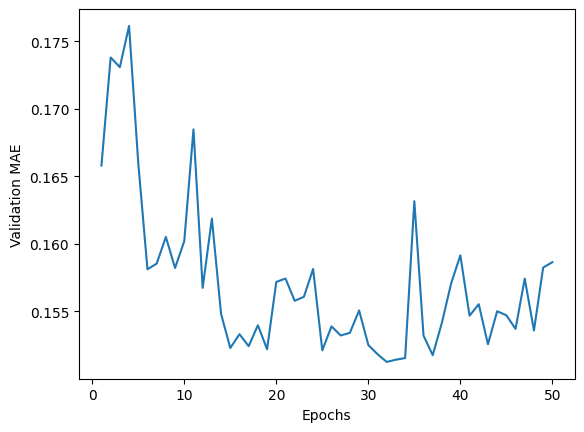

In [183]:

average_mae_history3 =[
    np.mean([x[i] for x in all_mae_histories3]) for i in range(num_epochs3)
]
plt.plot(range(1, len(average_mae_history3) + 1), average_mae_history3)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

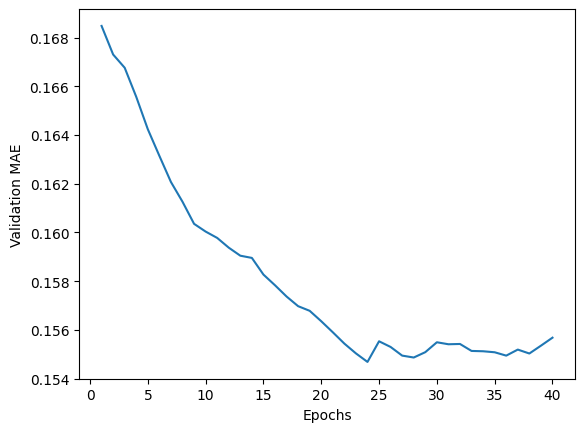

In [184]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history3 = smooth_curve(average_mae_history3[10:])
plt.plot(range(1, len(smooth_mae_history3) + 1), smooth_mae_history3)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [185]:

model3= build_model3()

model3.fit(Xtrn3, Ytrn3,
         epochs=28, batch_size=4, verbose=1)
test_mse_score3, test_mae_score3 = model3.evaluate(Xtest3, Ytest3)

Epoch 1/28
162/162 [==============================] - 1s 2ms/step - loss: 0.0564 - mae: 0.1857
Epoch 2/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0461 - mae: 0.1712
Epoch 3/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0457 - mae: 0.1684
Epoch 4/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0440 - mae: 0.1647
Epoch 5/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0427 - mae: 0.1677
Epoch 6/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0407 - mae: 0.1603
Epoch 7/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0407 - mae: 0.1600
Epoch 8/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0403 - mae: 0.1602
Epoch 9/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0395 - mae: 0.1596
Epoch 10/28
162/162 [==============================] - 0s 2ms/step - loss: 0.0387 - mae: 0.1578
Epoch 11/28
162/162 [============================

In [186]:
test_mae_score3

0.15251804888248444

In [187]:
y_pred3 = model3.predict(Xtest3)

error(y_pred3, Ytest3)

9/9 [==============================] - 0s 3ms/step
mean_absolute_error(y_true, y_pred)=0.1525180336260899
mean_absolute_percentage_error(y_true, y_pred)=0.30198340784805217
mean_squared_error(y_true, y_pred)=0.03653244285890128


# Metric

In [188]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [189]:
Xtest2.insert(0, 'pred1', y_pred1)
Xtest2.insert(7, 'pred2', y_pred2)
Xtest2.insert(8, 'pred3', y_pred3)
Xtest2

,pred1,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",pred2,pred3,"Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
360,0.466572,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.499848,0.528935,0.622262,0.0,0.706867,0.419113
427,0.490293,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.516163,0.475176,0.528535,0.0,0.536400,0.710983
611,0.460577,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.483688,0.491962,0.347209,1.0,0.425178,0.579405
336,0.492246,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.495741,0.484171,0.443355,0.0,0.741162,0.504853
604,0.465273,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.556694,0.524804,0.307091,1.0,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.426702,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.525312,0.488310,0.445939,0.0,0.401549,0.717647
149,0.505995,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.464824,0.497463,0.672341,0.0,0.291997,0.552182
561,0.457406,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.566493,0.500858,0.493243,1.0,0.804264,0.611119
632,0.453278,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.552310,0.535291,0.135191,1.0,0.288131,0.309775


In [190]:
col = Xtest2.columns
X_test_2 = pd.DataFrame(transformer.inverse_transform(Xtest2), columns = col, index=Xtest2.index)
X_test_2

,pred1,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",pred2,pred3,"Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
360,2.771425,2013.208862,429.919092,62.743272,23.961233,248.849293,322.220632,73.496149,2521.974989,250.822178,0.0,9.718023,52.698107
427,2.884497,2000.192995,751.441920,131.529481,22.208465,283.432980,73.430795,73.747550,2392.734881,223.967368,0.0,7.383516,69.437048
611,2.742849,2110.985588,31.608469,101.935506,19.462720,242.918105,688.874406,73.247138,2433.090649,172.013665,1.0,5.860357,61.890952
336,2.893805,2023.785804,723.921402,136.901365,21.650138,327.402856,726.627740,73.432872,2414.360731,199.561589,0.0,10.187672,57.615327
604,2.765233,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,74.372106,2512.042988,160.519027,1.0,10.264664,73.738350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2.581374,1983.452057,1026.233755,103.222956,18.009823,243.580494,733.269062,73.888536,2424.309211,200.302003,0.0,5.536762,69.819230
149,2.959345,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.956454,2446.315071,265.171039,0.0,4.036464,60.329680
561,2.727732,1989.373378,1209.768416,120.442159,22.656622,228.057719,546.080894,74.523109,2454.476843,213.855449,1.0,11.051849,63.709816
632,2.708056,1961.550076,1490.320115,122.233630,24.476798,332.384000,534.070329,74.304560,2537.255366,111.265919,1.0,3.983520,46.427463


In [191]:
print('Метрики для параметра "Соотношение матрица-наполнитель"')
error(X_test_2['pred1'], df.loc[Ytest1.index.tolist()]['Соотношение матрица-наполнитель'])
print('Метрики для параметра "Модуль упругости при растяжении, ГПа"')
error(X_test_2['pred2'], df.loc[Ytest2.index.tolist()]['Модуль упругости при растяжении, ГПа'])
print('Метрики для параметра "Прочность при растяжении, МПа"')
error(X_test_2['pred3'], df.loc[Ytest3.index.tolist()]['Прочность при растяжении, МПа'])

Метрики для параметра "Соотношение матрица-наполнитель"
mean_absolute_error(y_true, y_pred)=0.7372910834430327
mean_absolute_percentage_error(y_true, y_pred)=0.2646646228708843
mean_squared_error(y_true, y_pred)=0.8251732999659307
Метрики для параметра "Модуль упругости при растяжении, ГПа"
mean_absolute_error(y_true, y_pred)=2.609408701560549
mean_absolute_percentage_error(y_true, y_pred)=0.03522144236309586
mean_squared_error(y_true, y_pred)=10.638332377787476
Метрики для параметра "Прочность при растяжении, МПа"
mean_absolute_error(y_true, y_pred)=366.6596909998668
mean_absolute_percentage_error(y_true, y_pred)=0.1486868223679712
mean_squared_error(y_true, y_pred)=211136.17772206065


#Заключение
В результате проделанной работы были разработаны нейронные сети и модель градиентного бустинга CatBoost, позволяющие предсказывать три ключевых параметра композитных материалов с высокой точностью, а именно "Соотношение матрица-наполнитель", "Модуль упругости при растяжении, Гпа" и "Прочность при растяжении, Мпа". Модели прошли тестирование на реальных данных, показав точность прогноза около 80%, а некоторые даже около 100%. Использовались несколько различных метрик, таких как MAE, MSE, MAPE, что позволило убедиться в высоком качестве моделей.

Итак, модели машинного обучения могут использоваться для предсказания конечных свойств композитных материалов и успешно это делают, что открывает новые возможности для улучшения производства и создания новых и более эффективных материалов для различных сфер жизни. Модели могут быть использованы в промышленности для оптимизации производства композитных материалов, что приведет к экономическим и экологическим выгодам.